<a href="https://colab.research.google.com/github/Haffizuddin7899/Predicting-CPU-Burst-Times-with-Machine-Learning/blob/main/Predicting_CPU_Burst_Times_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting CPU Burst Times with Machine Learning
Comparative analysis and implementation of ML/AI algorithms and a neural network model to predict CPU burst times of processes, with application to operating systems scheduling (SJF/SRTF).

This project reproduces and extends the idea from academic work that more accurate CPU burst predictions can enhance the performance of Shortest-Job-First (SJF) and Shortest-Remaining-Time-First (SRTF) schedulers by providing better runtime estimates.

Contents
- How to run the project
- Dataset description
- Algorithms / Models
- Implementation steps
- Hardware / Software environment
- Comparative analysis outputs
- Conclusion
- References

---

## How to Run the Project

You can run this project locally (Python) or in a hosted environment (e.g., Google Colab).

Option A — Run in Google Colab (recommended)
1. Open a new Colab notebook.
2. Copy-paste the full pipeline code from the repository notebook/script into a notebook cell.
3. Run the cell. The code will:
   - Download and load the dataset,
   - Perform full EDA,
   - Preprocess and split the data,
   - Train multiple models,
   - Evaluate and visualize results,
   - Provide a `predict_cpu_burst(...)` function to get predictions from all models.

Option B — Run locally (Python)
1. Ensure you have Python 3.9+ installed.
2. Create and activate a virtual environment:
   ```bash
   python -m venv .venv
   # Windows:
   .venv\Scripts\activate
   # macOS/Linux:
   source .venv/bin/activate
   ```
3. Install dependencies:
   ```bash
   pip install -U pip
   pip install pandas numpy matplotlib seaborn missingno scikit-learn xgboost lightgbm
   ```
4. Run the script or Jupyter Notebook:
   - Script:
     ```bash
     python main.py
     ```
   - Notebook:
     ```bash
     pip install notebook
     jupyter notebook
     ```
     Open the notebook (e.g., cpu_burst_prediction.ipynb) and run all cells.

5. Optional: If you encounter build issues on xgboost/lightgbm (especially on Apple Silicon/Windows), you may temporarily disable those two models in the code or install prebuilt wheels following the libraries’ docs.

Outputs
- The pipeline prints summaries to the console and renders plots inline (Notebook/Colab).
- Comparative tables are displayed as DataFrames.
- The prediction utility prints and plots per-model predictions for any given sample(s).

---

## Dataset Description

Source
- Dropbox file: https://www.dropbox.com/s/ikyxo0zew514a0b/processes_datasets.csv

Observed download log (example)
```text
--2025-11-27 12:17:02--  https://www.dropbox.com/s/ikyxo0zew514a0b/processes_datasets.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/h7expu9n3e04pddcl494y/processes_datasets.csv?rlkey=3lcfn9mx2ndnswqa5gb8ct0kb [following]
--2025-11-27 12:17:02--  https://www.dropbox.com/scl/fi/h7expu9n3e04pddcl494y/processes_datasets.csv?rlkey=3lcfn9mx2ndnswqa5gb8ct0kb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com/cd/0/inline/C18JUOXu1JVsrwgs6DeTuCUZHyw4MO9dzA69W1-5zm2jEPgzVZ0j2fcoAqenSyzaV7XvTexiNv4eoNY1TlVf2hmUmGcq1zR02GUS-9O9mDQjqH48_ecAYgC19_Rw0I36QJo/file# [following]
--2025-11-27 12:17:03--  https://uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com/cd/0/inline/C18JUOXu1JVsrwgs6DeTuCUZHyw4MO9dzA69W1-5zm2jEPgzVZ0j2fcoAqenSyzaV7XvTexiNv4eoNY1TlVf2hmUmGcq1zR02GUS-9O9mDQjqH48_ecAYgC19_Rw0I36QJo/file
Resolving uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com (uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com (uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com)|162.125.5.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49425441 (47M) [text/plain]
Saving to: ‘processes_datasets.csv.1’

processes_datasets. 100%[===================>]  47.14M  53.3MB/s    in 0.9s    

2025-11-27 12:17:04 (53.3 MB/s) - ‘processes_datasets.csv.1’ saved [49425441/49425441]
```

Shape and columns (observed)
- Rows: 404,176
- Columns: 29
- Head sample:
  ```
  JobID  SubmitTime   WaitTime   RunTime  NProcs  AverageCPUTimeUsed  Used Memory  ReqNProcs  ReqTime:  ReqMemory  ...  JobStructureParams  UsedNetwork  UsedLocalDiskSpace  UsedResources  ReqPlatform  ReqNetwork  ReqLocalDiskSpace  ReqResources  VOID  ProjectID
  1      1136070024   203761     138467   1       138371              98652        1          259200    -1         ...  -1                   -1           -1                   -1             -1           -1           -1                 -1            -1    -1
  2      1136070690   0          11       1       4                   35848        1          259200    -1         ...  -1                   -1           -1                   -1             -1           -1           -1                 -1            -1    -1
  ...
  ```

Notes
- Many “Req*”, “Used*”, “JobStructure*”, “VOID”, “ProjectID” fields use -1 to indicate missing or not-applicable values.
- Column names may include whitespace or punctuation (e.g., `ReqTime:`). The pipeline strips whitespace to harmonize names.
- Target variable: RunTime (the CPU burst length we aim to predict).
- The dataset is large but manageable on a modern laptop (≈47 MB CSV, ~400k rows).
- ID-like categorical columns include: UserID, QueueID, GroupID, ExecutableID, OrigSiteID, LastRunSiteID.

---

## Algorithms / Models

We implement and compare the following supervised regression models:

Linear and Regularized Linear Models
- Linear Regression
- Ridge Regression
- Lasso Regression
- ElasticNet

Tree-Based and Ensemble Models
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- AdaBoost Regressor

Boosted GBDT Frameworks
- XGBoost Regressor (optional)
- LightGBM Regressor (optional)

Kernel/Instance-Based/NN
- Support Vector Regression (RBF kernel)
- K-Nearest Neighbors Regressor
- Multi-Layer Perceptron Regressor (feed-forward NN)

Evaluation Metrics
- R², Adjusted R²
- RMSE, MAE
- MAPE
- Explained Variance
- Training time
- Overfitting analysis (Train vs Test R² gap)

---

## Implementation Steps

The code follows these end‑to‑end steps aligned with your requested structure:

1) Import all necessary libraries
- pandas, numpy, matplotlib, seaborn, missingno
- scikit-learn preprocessing, model selection, metrics
- Model libraries (sklearn, xgboost, lightgbm)
- Warnings and plotting defaults

2) Load the data from the data source
- Downloads the CSV via wget in Colab or reads local file
- Prints dataset shape and previews head/tail

3) Apply EDA (descriptive + visualization)
- .info(), .describe(), data types, unique counts
- Missing values matrix and bar plot (missingno)
- Target distribution, numeric histograms, box plots
- Correlation matrix heatmap
- Selected categorical distributions (top 5 categorical columns)
- Outlier inspection via box plots

4) Preprocessing (incl. Train/Test split)
- Strip column whitespace
- Drop highly-missing, low-signal columns (JobStructure*, UsedNetwork, UsedLocalDiskSpace, UsedResources, ReqPlatform, ReqNetwork, ReqLocalDiskSpace, ReqResources, VOID, ProjectID) if present
- Replace sentinel -1 with NaN and impute (median for numeric, mode for categorical)
- Convert ID columns (UserID, QueueID, GroupID, ExecutableID, OrigSiteID, LastRunSiteID) to numeric ranks (dense ranking)
- Optional outlier capping via IQR
- 70/30 split into Train/Test
- Feature scaling with StandardScaler (and RobustScaler prepared)

5) Feature Engineering
- Example engineered features (e.g., memory ratios, interactions if signals exist)
- Maintain consistent feature order and scalers for inference

6) Initialize all models (separately)
- Reasonable baseline hyperparameters for all models
- Toggle XGBoost/LightGBM if unavailable

7) Train all models (separately)
- Time each fit
- Maintain trained model registry for later evaluation and prediction

8) Evaluate and visualize results (Train and Test)
- Compute R², Adjusted R², RMSE, MAE, MAPE, EVS
- Visual comparisons (R², RMSE, MAE bar charts)
- Actual vs Predicted, Residuals, Error distributions for top models

9) Comparative analysis across models
- Best-by-metric tables
- Overfitting analysis (Train/Test R² gap)
- Composite ranking with normalized metrics and optional training time weighting
- Complexity vs performance visualization

10) Prediction function
- `predict_cpu_burst(sample)` accepts dict/Series/DataFrame
- Applies feature alignment and scaling
- Returns per-model predictions and summary statistics
- Produces visual comparison plot for single/multiple samples

---

## Hardware / Software Environment

Recommended
- CPU: Any recent 4+ core CPU (8+ threads preferred)
- RAM: 8 GB minimum (16 GB recommended)
- Disk: ~1 GB free for data and caches
- OS: Windows 10/11, macOS 12+, Ubuntu 20.04+

Software
- Python: 3.9–3.12
- Packages:
  - pandas, numpy
  - matplotlib, seaborn, missingno
  - scikit-learn
  - xgboost (optional)
  - lightgbm (optional)
- Jupyter/Colab for EDA and plots

Notes
- XGBoost and LightGBM may require platform-specific installation steps; if unavailable, comment those models out—the pipeline continues with the remaining models.
- The dataset is ~47 MB; memory footprint during modeling is higher due to multiple copies and models. Close other apps if you experience memory pressure.

---

## Comparative Analysis Outputs

The pipeline produces:
- Training and testing metrics for each model (DataFrames).
- Bar charts comparing Train vs Test R², RMSE, MAE.
- Top-3 models’ scatter plots (Actual vs Predicted), residuals, and error histograms.
- Overfitting analysis table and plot.
- Overall ranking considering accuracy metrics and optional training time.

How to interpret
- Prefer models with high Test R² and low RMSE/MAE.
- Check residual plots for systematic bias.
- Compare Train vs Test R² to detect overfitting.
- If latency is critical (e.g., online scheduling), weigh training/inference time more heavily.

---

## Conclusion

- Accurate CPU burst prediction can substantially aid SJF and SRTF schedulers by providing better runtime estimates, ultimately improving average waiting time and turnaround time.
- In general:
  - Gradient-boosted trees (GBDTs such as XGBoost/LightGBM/Sklearn-GBR) and Random Forests tend to provide strong baselines for tabular data like this dataset.
  - Linear/regularized models are fast and interpretable but may underfit if relationships are nonlinear.
  - SVR/MLP can perform well but may require careful tuning and scaling.
- The included pipeline:
  - Implements robust preprocessing and feature handling,
  - Benchmarks multiple models fairly,
  - Provides clear visual diagnostics,
  - Exposes a unified prediction function for downstream integration.

Future work
- Hyperparameter tuning (RandomizedSearchCV/Optuna).
- Feature selection/importance analysis (permutation, SHAP).
- Time-aware validation if temporal drift exists.
- Integration into a simulator to quantify the improvement in SJF/SRTF scheduling metrics using predicted vs baseline (e.g., exponential averaging) burst times.

---

## References

- Paper 1: “Comparative Analysis and Implementation of AI Algorithms and NN Model in Process Scheduling Algorithm”
- Paper 2: “Predicting CPU Burst Times with ML to Enhance Shortest Job First (SJF) and Shortest Remaining Time First (SRTF) CPU Scheduling”
  - Emmanuel Effah, Stephen Julius Atsu, Zerubbabel Abeeku Brew, Joseph Kofi Mensah, Evans Adjei Quaicoe, Michael Owusu Ansah, Anthony Yeful, Rowland P. Baffoe
  - Departments: University of Mines and Technology (Ghana), University of Cape Coast (Ghana)
- Paper 3: “CPU Burst-Time Estimation using Machine Learning”
  - Prathamesh Samal, Sagar Jha
  - CSED, Thapar Institute of Engineering and Technology, Patiala, India
  - 2022 IEEE Delhi Section Conference (DELCON) | DOI: 10.1109/DELCON54057.2022.9753639

---

## Acknowledgements

Thanks to the authors of the above works for the insights motivating ML-based CPU burst prediction and its application to SJF/SRTF scheduling improvements.

---

# STEP 1: IMPORT ALL NECESSARY LIBRARIES

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn. impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation Metrics
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                              r2_score, explained_variance_score,
                              mean_absolute_percentage_error)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# STEP 2: LOAD THE DATA FROM DATA SOURCE

In [ ]:

# Download the dataset
! wget https://www.dropbox.com/s/ikyxo0zew514a0b/processes_datasets.csv

# Load the dataset
data = pd.read_csv('processes_datasets.csv')

print("✅ Data loaded successfully!")
print(f"\nDataset Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

# Display first few rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF THE DATASET")
print("="*80)
display(data.head())

# Display last few rows
print("\n" + "="*80)
print("LAST 5 ROWS OF THE DATASET")
print("="*80)
display(data. tail())

--2025-11-27 12:17:02--  https://www.dropbox.com/s/ikyxo0zew514a0b/processes_datasets.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/h7expu9n3e04pddcl494y/processes_datasets.csv?rlkey=3lcfn9mx2ndnswqa5gb8ct0kb [following]
--2025-11-27 12:17:02--  https://www.dropbox.com/scl/fi/h7expu9n3e04pddcl494y/processes_datasets.csv?rlkey=3lcfn9mx2ndnswqa5gb8ct0kb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com/cd/0/inline/C18JUOXu1JVsrwgs6DeTuCUZHyw4MO9dzA69W1-5zm2jEPgzVZ0j2fcoAqenSyzaV7XvTexiNv4eoNY1TlVf2hmUmGcq1zR02GUS-9O9mDQjqH48_ecAYgC19_Rw0I36QJo/file# [following]
--2025-11-27 12:17:03--  https://uc1c3fc953daf1d2067900766c33.dl.dropboxusercontent.com/cd/0

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
0,1,1136070024,203761,138467,1,138371,98652,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,1136070690,0,11,1,4,35848,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3,1136071207,117,201203,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,4,1136071267,4406,196985,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,5,1136071269,202516,19520,1,18731,522268,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1



LAST 5 ROWS OF THE DATASET


,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
404171,404172,1167603618,2,56,1,18,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404172,404173,1167603624,1,57,1,17,61084,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404173,404174,1167603637,1,45,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404174,404175,1167603747,1,43,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404175,404176,1167605790,52,-1,0,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

## 3.1 DESCRIPTIVE STATISTICS

In [ ]:


print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)


print("\n📊 DATASET INFORMATION")
print("-" * 80)
print(data.info())

print("\n📊 DATASET DESCRIPTION (NUMERICAL FEATURES)")
print("-" * 80)
display(data.describe())

print("\n📊 DATASET DESCRIPTION (ALL FEATURES INCLUDING CATEGORICAL)")
print("-" * 80)
display(data. describe(include='all'))

print("\n📊 DATA TYPES")
print("-" * 80)
print(data. dtypes)

print("\n📊 COLUMN NAMES")
print("-" * 80)
print(data. columns.tolist())

print("\n📊 MISSING VALUES ANALYSIS")
print("-" * 80)
missing_data = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0]. sort_values(
    'Missing_Percentage', ascending=False
)
display(missing_data)

print("\n📊 DUPLICATE ROWS")
print("-" * 80)
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(data)*100):.2f}%")

print("\n📊 UNIQUE VALUES IN EACH COLUMN")
print("-" * 80)
unique_counts = pd.DataFrame({
    'Column': data.columns,
    'Unique_Values': [data[col].nunique() for col in data.columns],
    'Data_Type': data.dtypes
})
display(unique_counts)


EXPLORATORY DATA ANALYSIS

📊 DATASET INFORMATION
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404176 entries, 0 to 404175
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   JobID               404176 non-null  int64 
 1   SubmitTime          404176 non-null  int64 
 2   WaitTime            404176 non-null  int64 
 3   RunTime             404176 non-null  int64 
 4   NProcs              404176 non-null  int64 
 5   AverageCPUTimeUsed  404176 non-null  int64 
 6   Used Memory         404176 non-null  int64 
 7   ReqNProcs           404176 non-null  int64 
 8   ReqTime:            404176 non-null  int64 
 9   ReqMemory           404176 non-null  int64 
 10  Status              404176 non-null  int64 
 11  UserID              404176 non-null  object
 12  GroupID             404176 non-null  object
 13  ExecutableID      

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
count,404176.000000,4.041760e+05,4.041760e+05,4.041760e+05,404176.000000,404176.000000,4.041760e+05,404176.0,404176.000000,4.041760e+05,...,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0
mean,202088.500000,1.152863e+09,9.729772e+03,2.166128e+04,0.860049,18882.036120,2.542120e+05,1.0,221959.354675,7.631699e+04,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,116675.705537,8.194747e+06,5.140432e+04,3.881557e+04,0.346937,33011.668406,3.342076e+05,0.0,109882.318776,2.472621e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.136070e+09,0.000000e+00,-1.000000e+00,0.000000,-1.000000,-1.000000e+00,1.0,-1.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,101044.750000,1.146471e+09,1.000000e+00,1.900000e+01,1.000000,3.000000,0.000000e+00,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,202088.500000,1.152484e+09,5.800000e+01,6.300000e+02,1.000000,21.000000,7.928000e+04,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,303132.250000,1.159321e+09,3.147000e+03,3.367800e+04,1.000000,30484.750000,5.750920e+05,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,404176.000000,1.167606e+09,4.345394e+06,1.575814e+06,1.000000,259316.000000,3.667652e+06,1.0,345600.000000,1.126400e+06,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0



📊 DATASET DESCRIPTION (ALL FEATURES INCLUDING CATEGORICAL)
--------------------------------------------------------------------------------


,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
count,404176.000000,4.041760e+05,4.041760e+05,4.041760e+05,404176.000000,404176.000000,4.041760e+05,404176.0,404176.000000,4.041760e+05,...,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0,404176.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,202088.500000,1.152863e+09,9.729772e+03,2.166128e+04,0.860049,18882.036120,2.542120e+05,1.0,221959.354675,7.631699e+04,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,116675.705537,8.194747e+06,5.140432e+04,3.881557e+04,0.346937,33011.668406,3.342076e+05,0.0,109882.318776,2.472621e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.136070e+09,0.000000e+00,-1.000000e+00,0.000000,-1.000000,-1.000000e+00,1.0,-1.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,101044.750000,1.146471e+09,1.000000e+00,1.900000e+01,1.000000,3.000000,0.000000e+00,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,202088.500000,1.152484e+09,5.800000e+01,6.300000e+02,1.000000,21.000000,7.928000e+04,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,303132.250000,1.159321e+09,3.147000e+03,3.367800e+04,1.000000,30484.750000,5.750920e+05,1.0,259200.000000,-1.000000e+00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0



📊 DATA TYPES
--------------------------------------------------------------------------------
JobID                  int64
SubmitTime             int64
WaitTime               int64
RunTime                int64
NProcs                 int64
AverageCPUTimeUsed     int64
Used Memory            int64
ReqNProcs              int64
ReqTime:               int64
ReqMemory              int64
Status                 int64
UserID                object
GroupID               object
ExecutableID          object
QueueID               object
PartitionID            int64
OrigSiteID            object
LastRunSiteID         object
JobStructure           int64
JobStructureParams     int64
UsedNetwork            int64
UsedLocalDiskSpace     int64
UsedResources          int64
ReqPlatform            int64
ReqNetwork             int64
ReqLocalDiskSpace      int64
ReqResources           int64
VOID                   int64
ProjectID              int64
dtype: object

📊 COLUMN NAMES
----------------------------------

,Column,Missing_Count,Missing_Percentage



📊 DUPLICATE ROWS
--------------------------------------------------------------------------------
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

📊 UNIQUE VALUES IN EACH COLUMN
--------------------------------------------------------------------------------


,Column,Unique_Values,Data_Type
JobID,JobID,404176,int64
SubmitTime,SubmitTime,326785,int64
WaitTime,WaitTime,53042,int64
RunTime,RunTime,82498,int64
NProcs,NProcs,2,int64
AverageCPUTimeUsed,AverageCPUTimeUsed,74963,int64
Used Memory,Used Memory,88082,int64
ReqNProcs,ReqNProcs,1,int64
ReqTime:,ReqTime:,32,int64
ReqMemory,ReqMemory,8,int64


## 3.2 VISUALIZATION


📈 DATA VISUALIZATIONS
--------------------------------------------------------------------------------


<Figure size 1600x800 with 0 Axes>

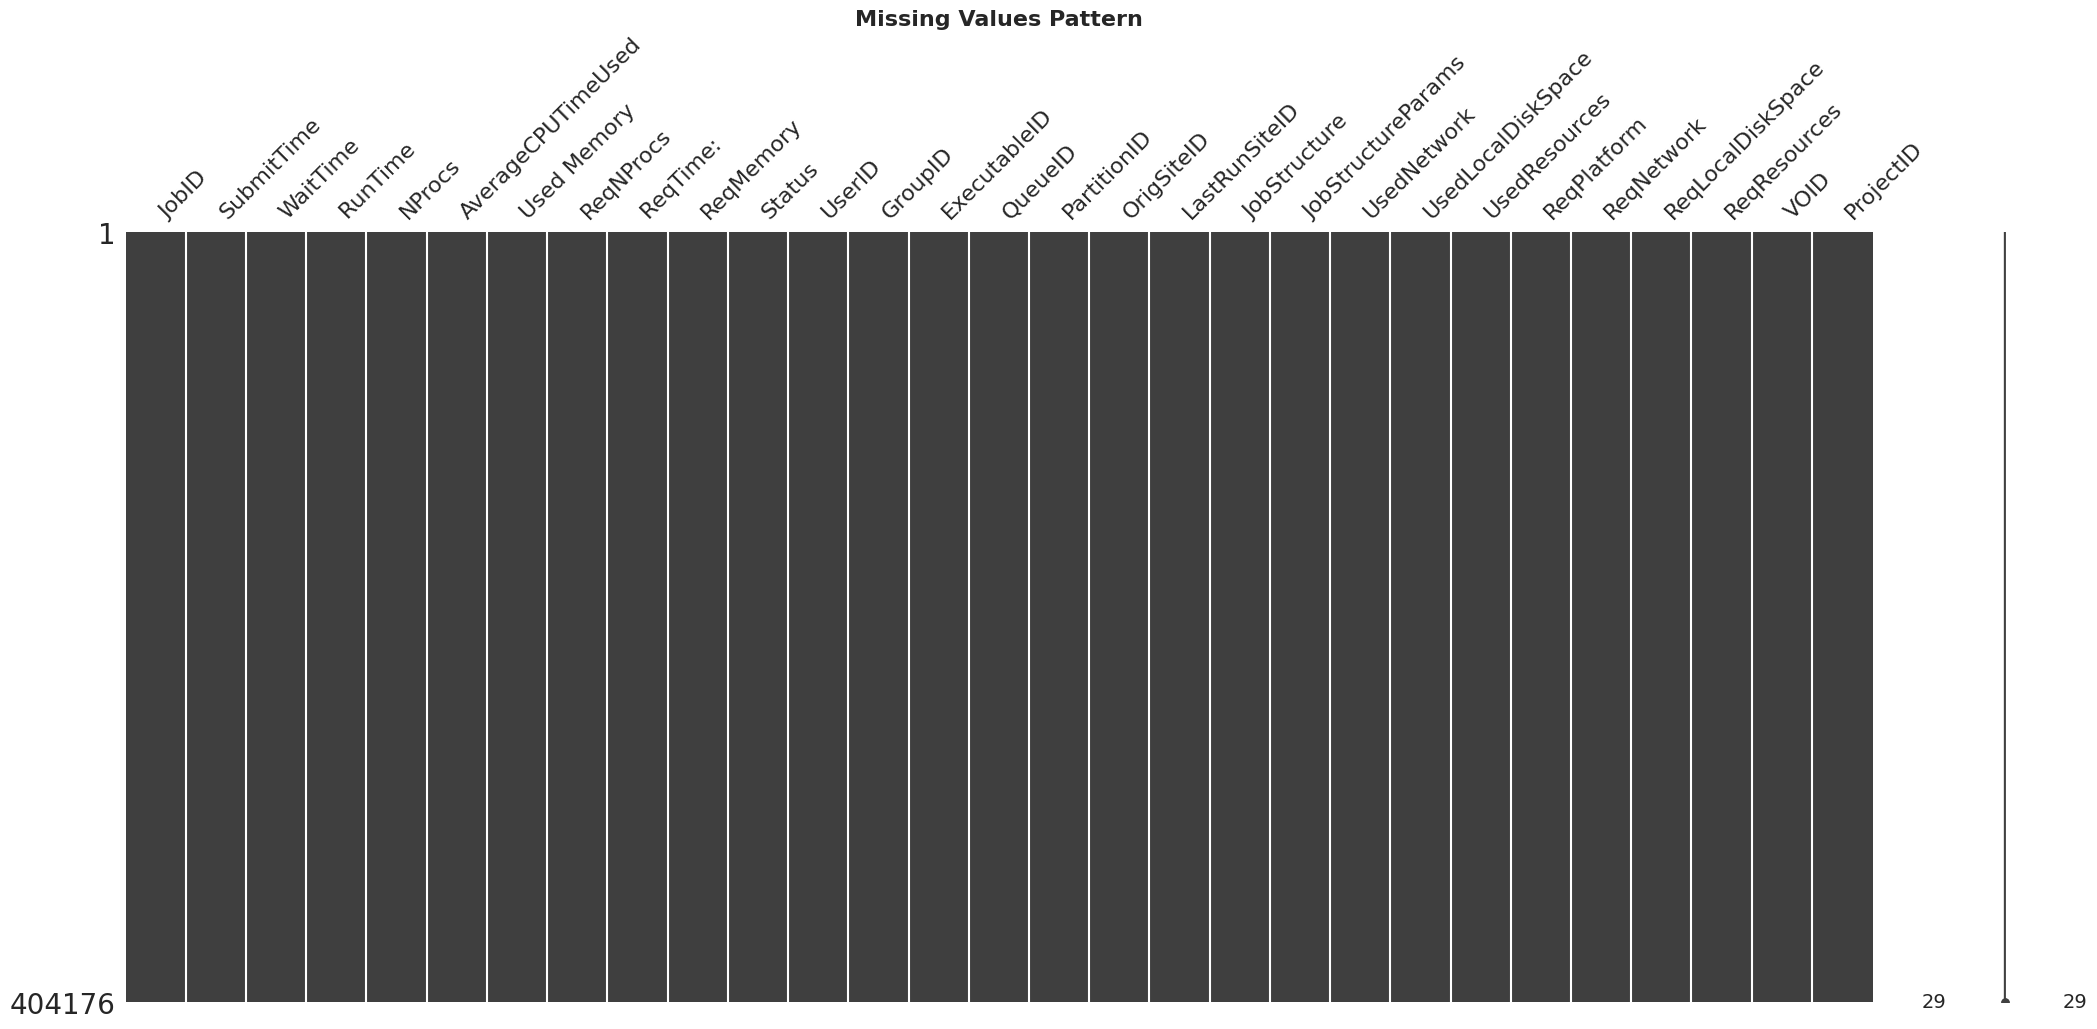

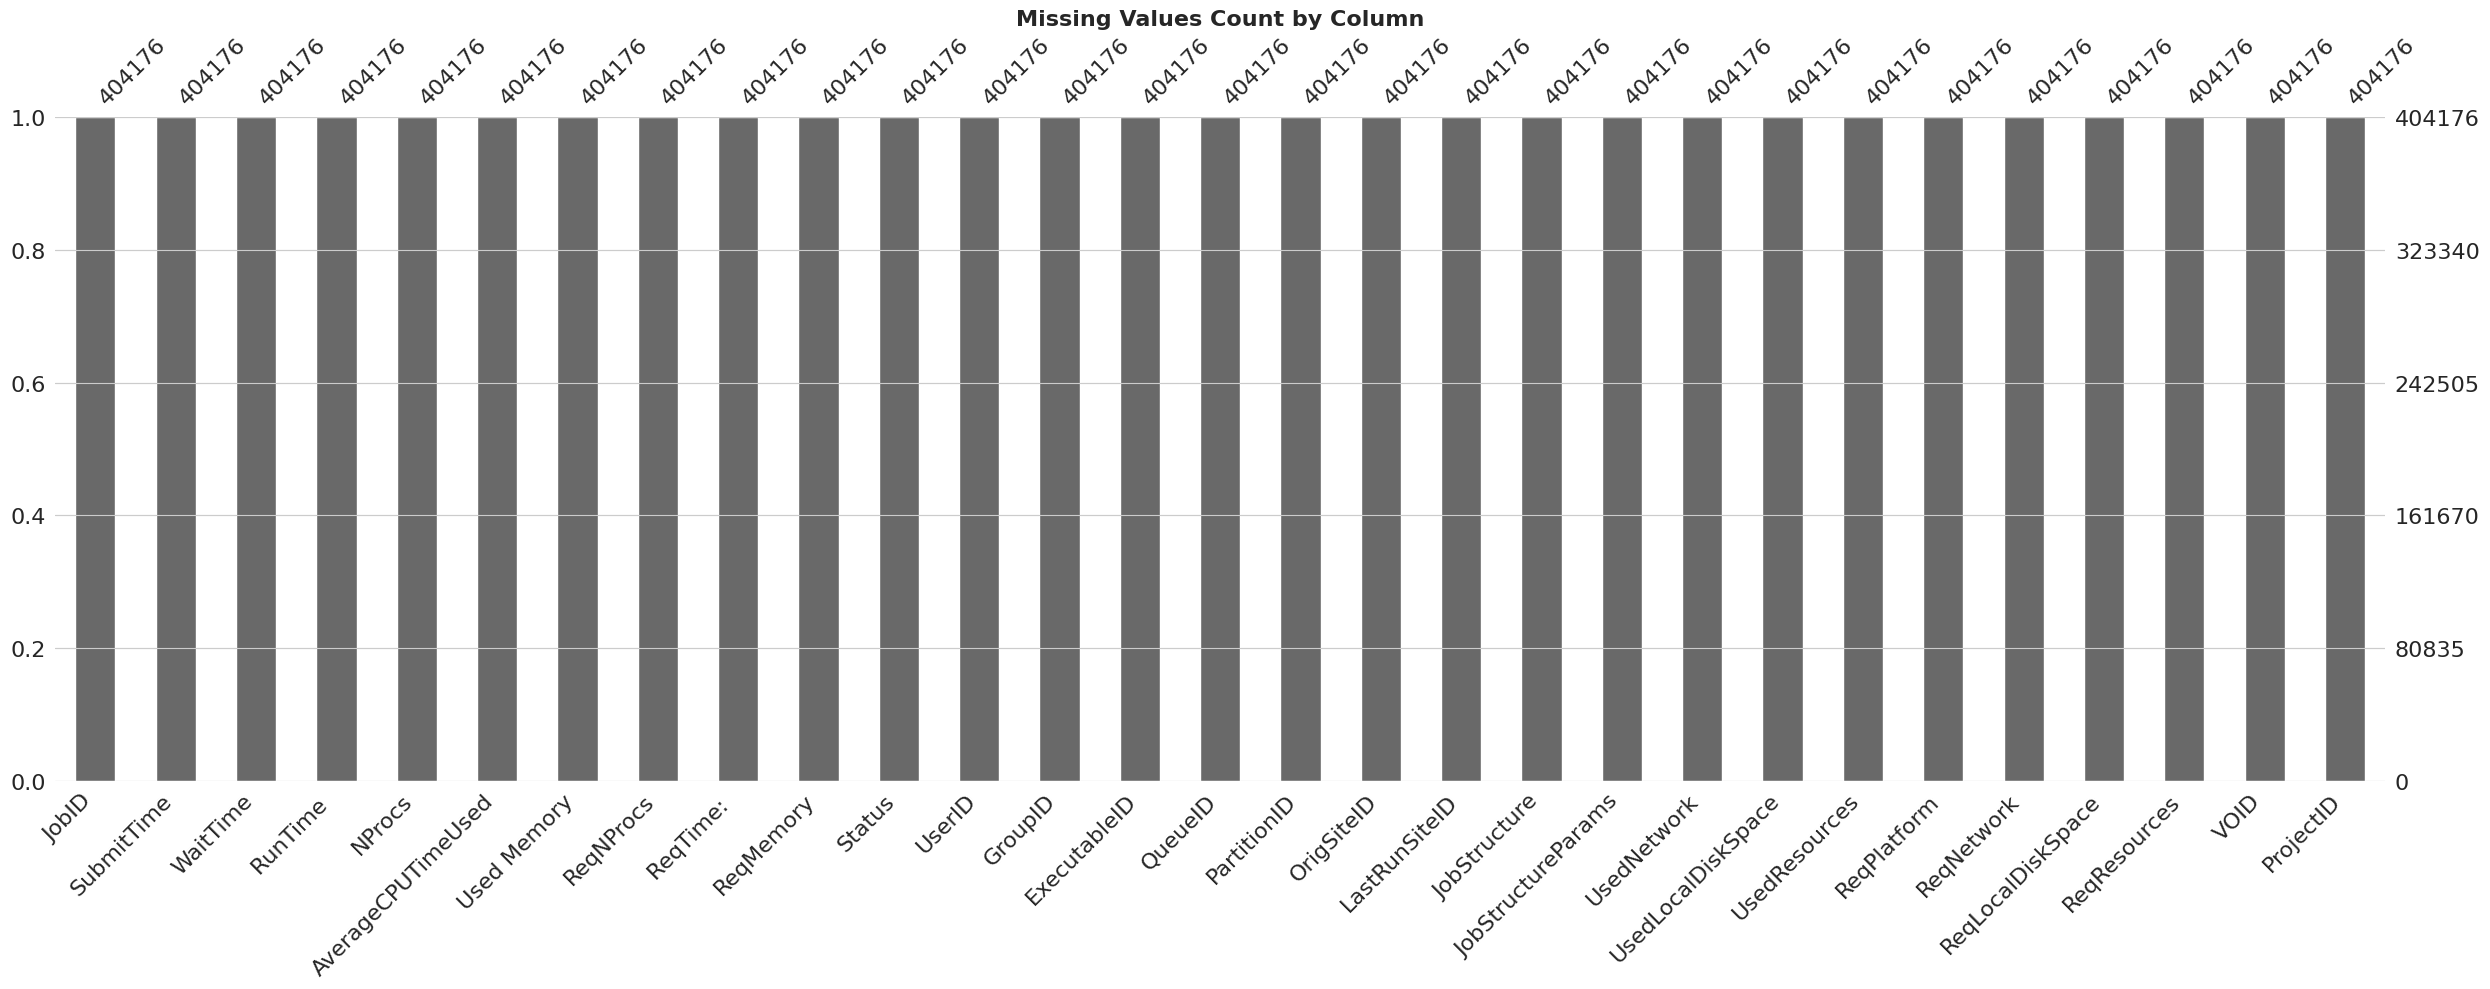


🎯 Target Variable: RunTime 


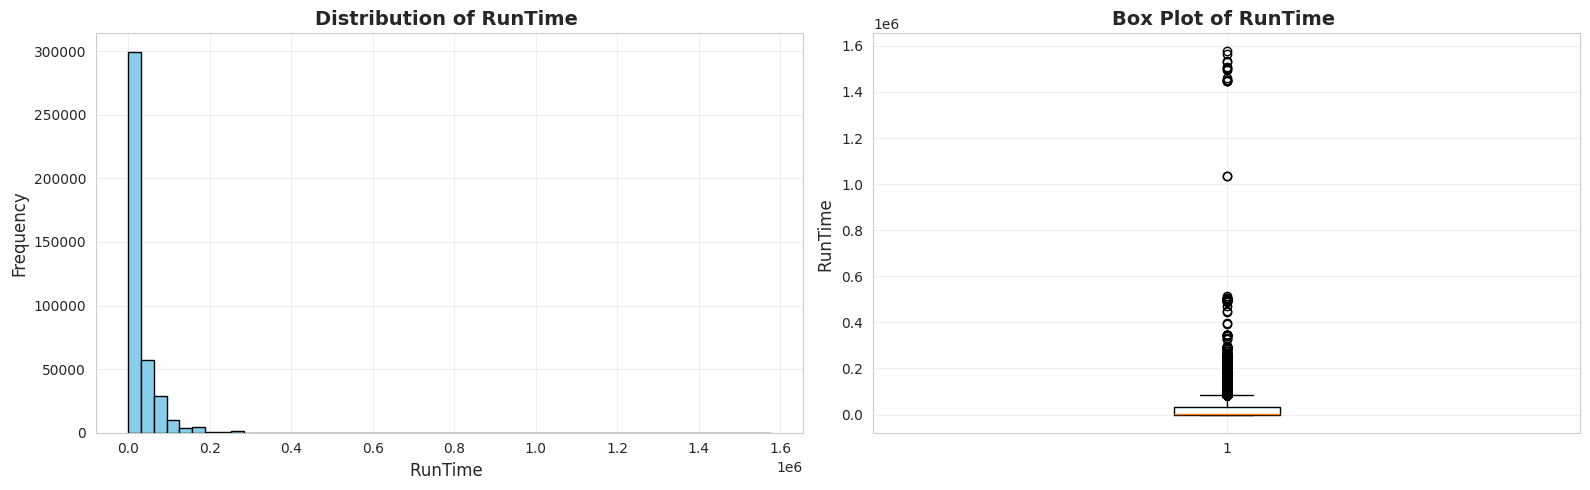


RunTime  Statistics:
  Mean: 21661.28
  Median: 630.00
  Std Dev: 38815.57
  Min: -1.00
  Max: 1575814.00
  Skewness: 4.40
  Kurtosis: 82.86

📊 Numerical Features: 23


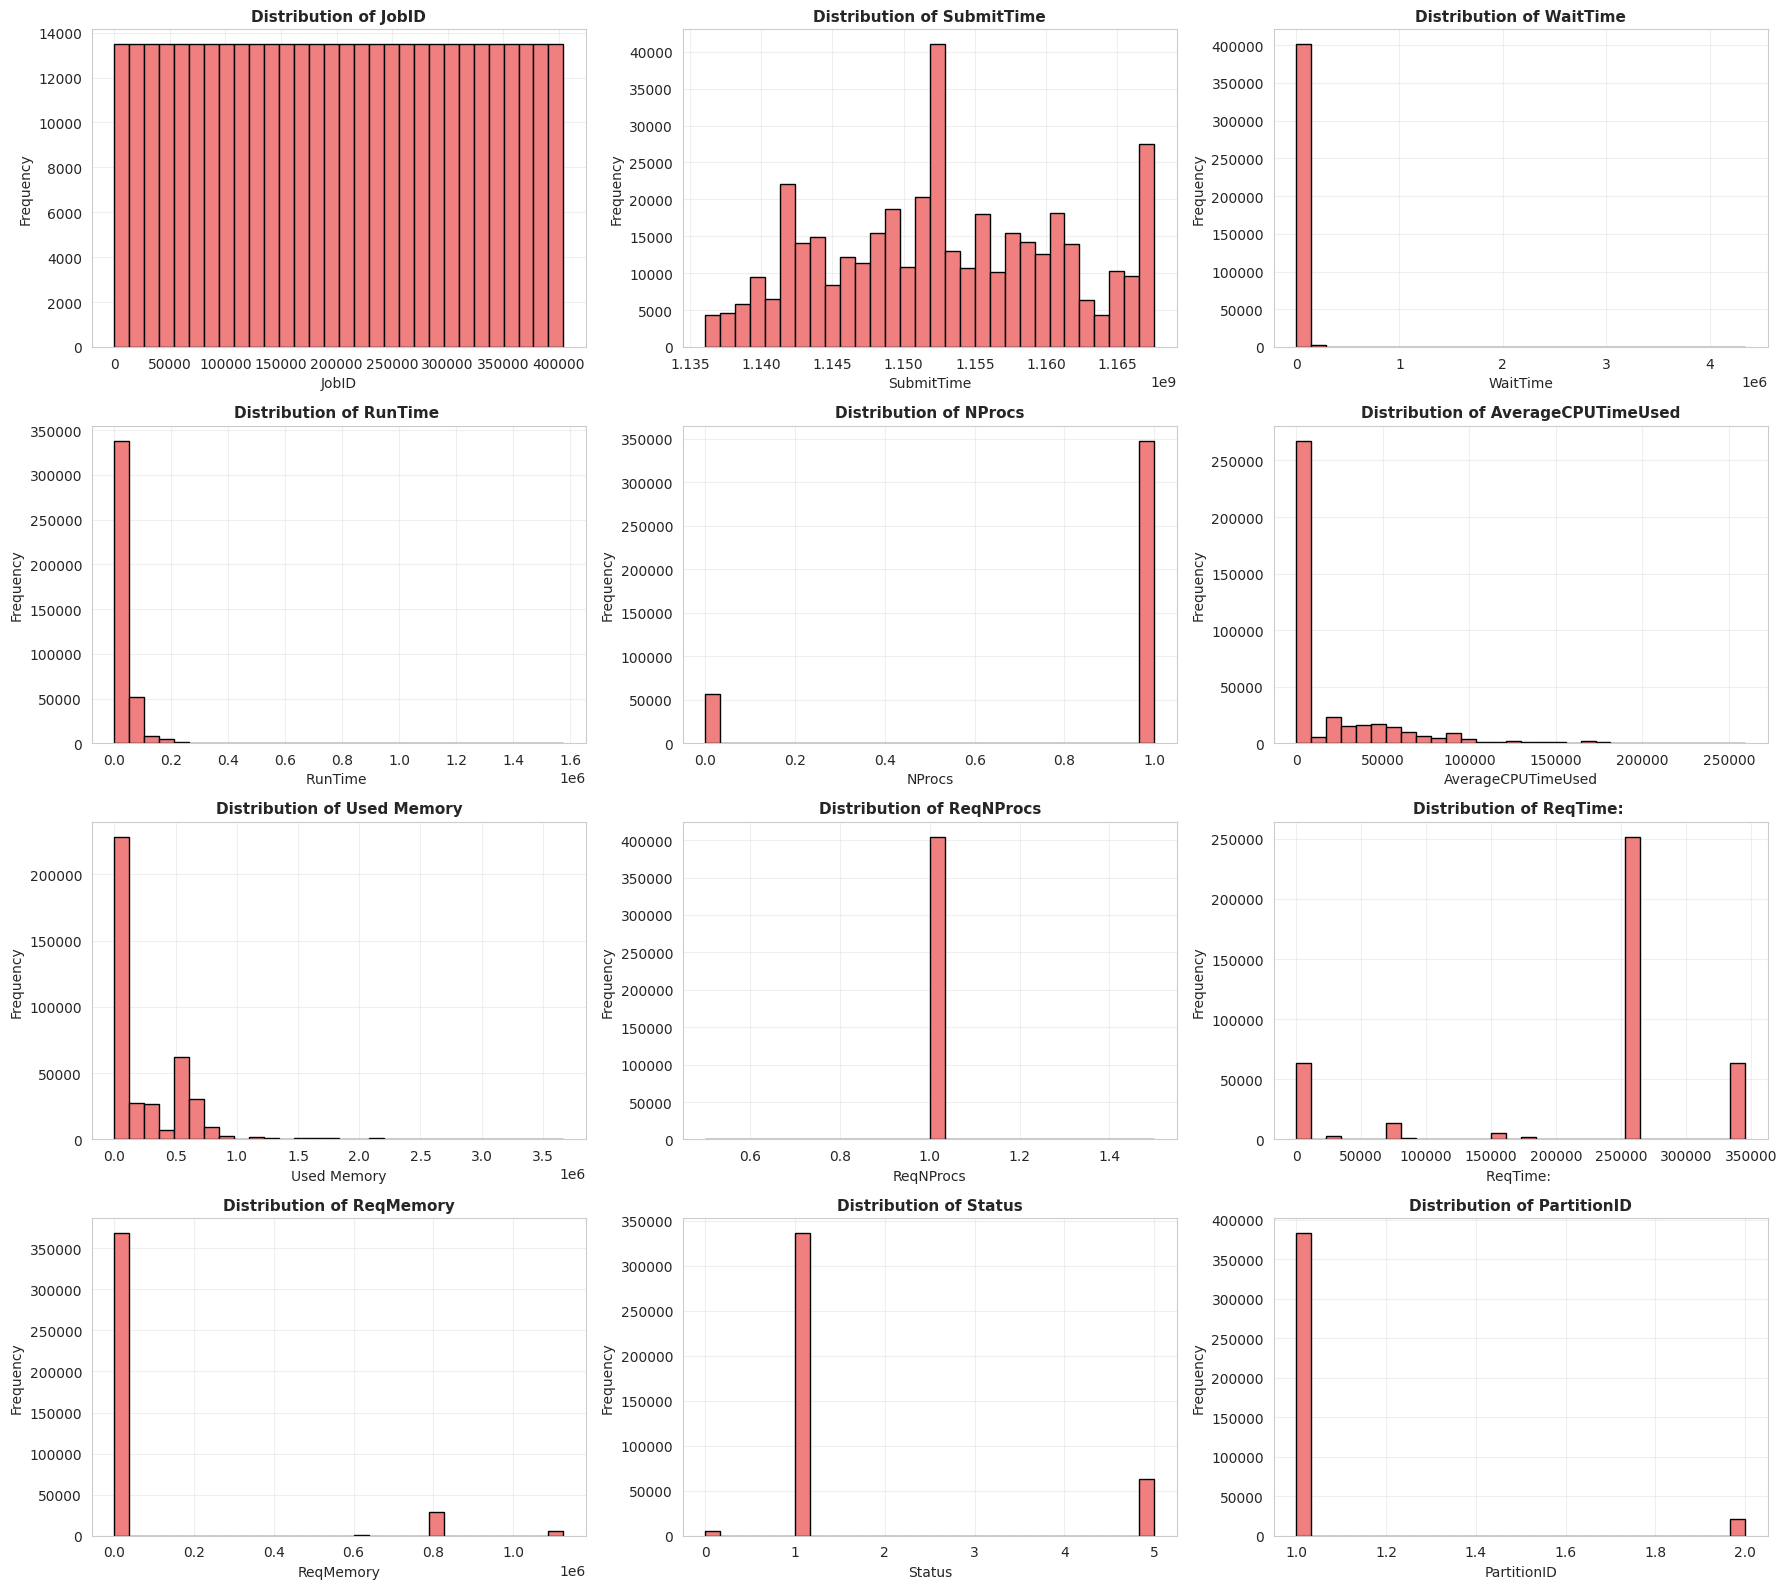


🔥 CORRELATION ANALYSIS
--------------------------------------------------------------------------------


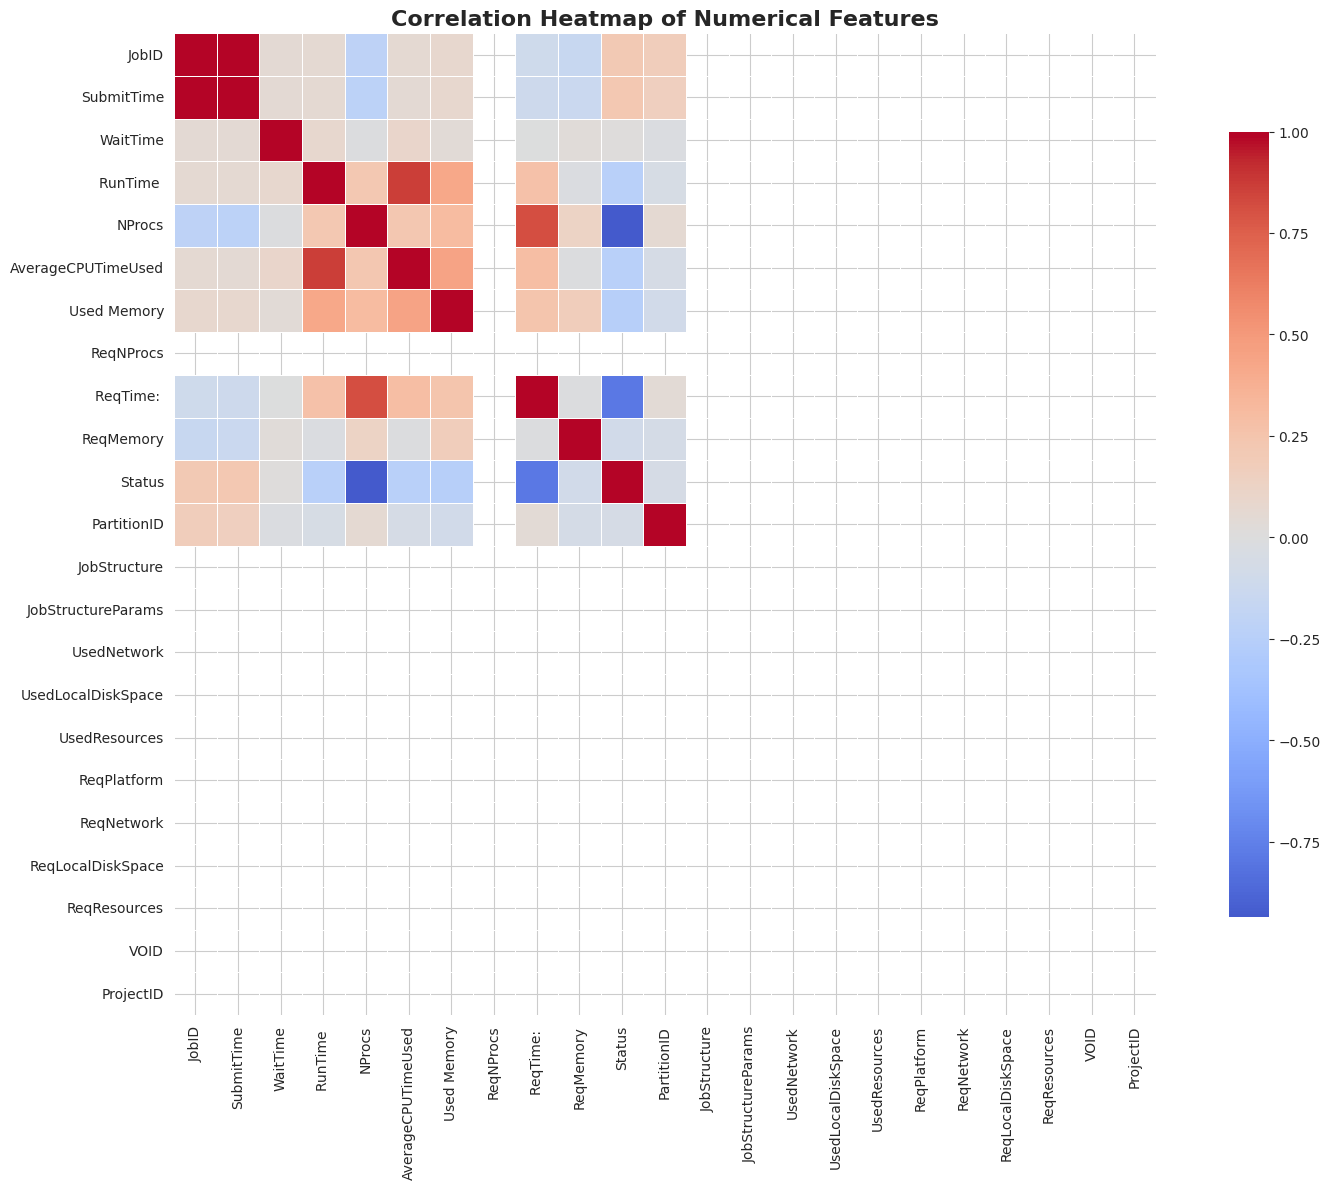


🎯 Top 10 Features Correlated with RunTime :
RunTime               1.000000
AverageCPUTimeUsed    0.864234
Used Memory           0.419717
ReqTime:              0.274379
NProcs                0.225126
WaitTime              0.082618
JobID                 0.061998
SubmitTime            0.055988
ReqMemory            -0.017943
PartitionID          -0.050215
Status               -0.242107
Name: RunTime , dtype: float64

📊 Categorical Features: 6

UserID - Value Counts:
UserID
-1         56565
U3034S2    18021
U247       16218
U45        11259
U256       11083
U257        9781
U3001S2     9663
U41         8082
U2043S1     6619
U1004S0     6220
Name: count, dtype: int64

GroupID - Value Counts:
GroupID
G3    145508
G4     88681
-1     56565
G2     37792
G1     24311
G6     15924
G7     13790
G8     11903
G5      9702
Name: count, dtype: int64


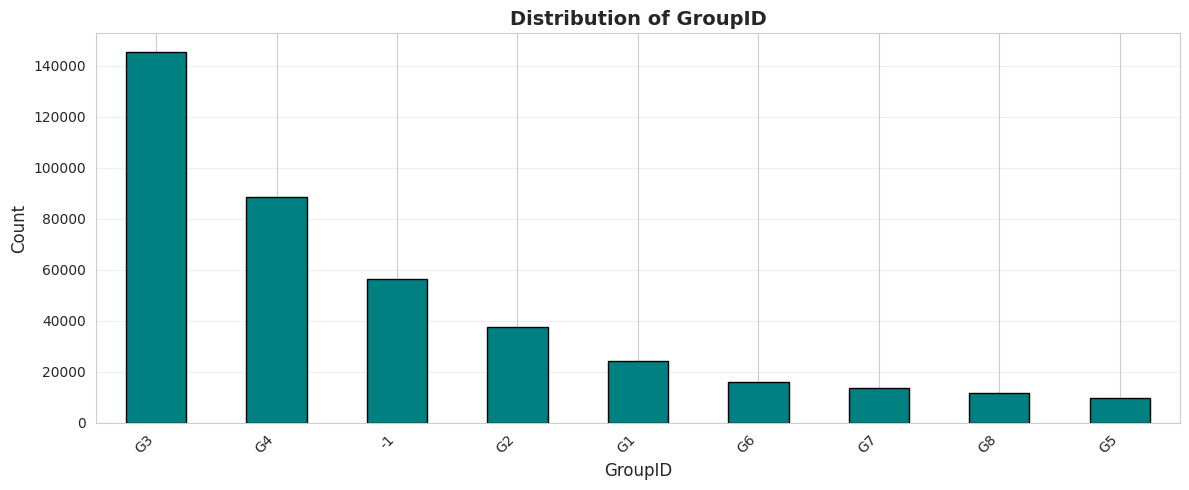


ExecutableID - Value Counts:
ExecutableID
X1     209563
X2     138010
-1      56565
X3         17
X4          9
X14         2
X5          1
X10         1
X8          1
X6          1
Name: count, dtype: int64


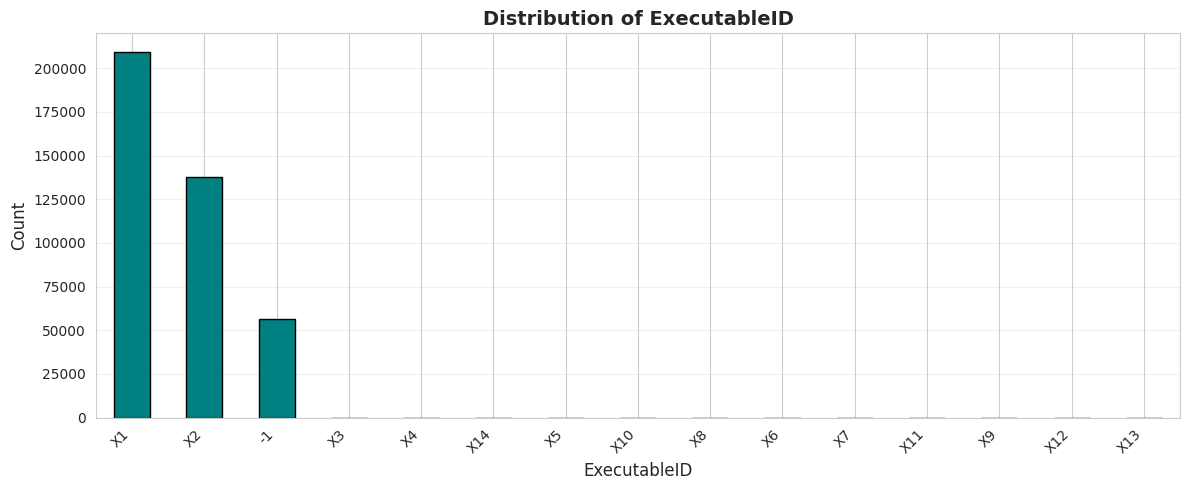


QueueID - Value Counts:
QueueID
Q9     100121
Q11     67487
Q10     61001
Q5      33753
Q8      33733
Q1      28572
Q3      22236
Q7      12773
Q12     12429
Q4      12105
Name: count, dtype: int64


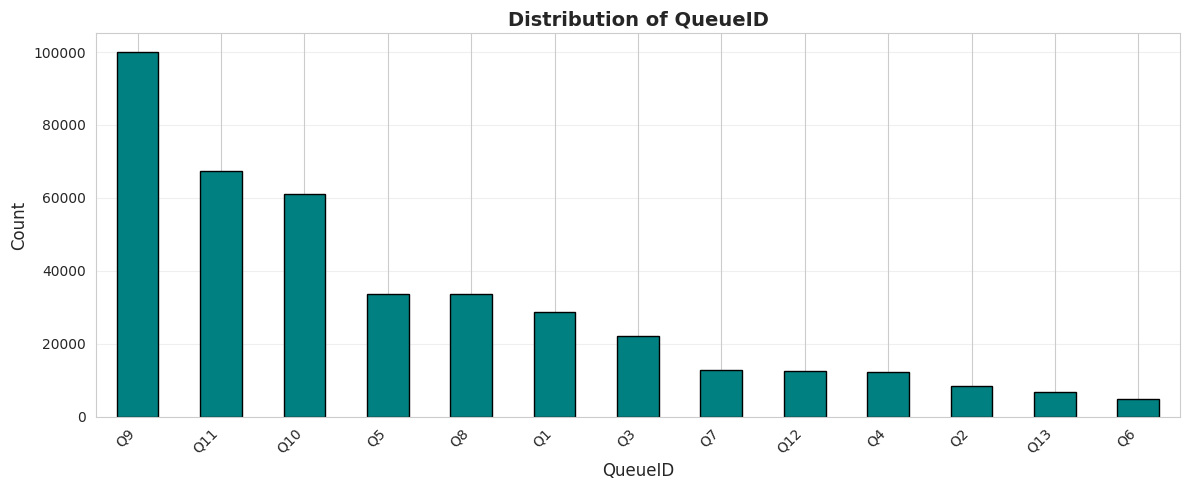


OrigSiteID - Value Counts:
OrigSiteID
clrlcgce03    160766
clrlcgce01     94194
clrlcgce02     86904
opgc           40890
iut15          21422
Name: count, dtype: int64


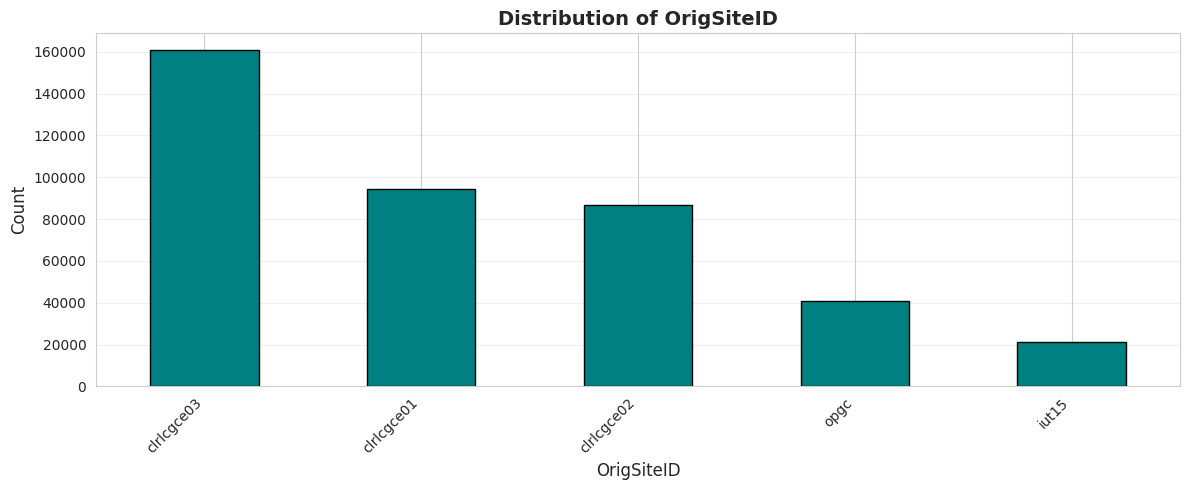


📦 OUTLIER DETECTION
--------------------------------------------------------------------------------


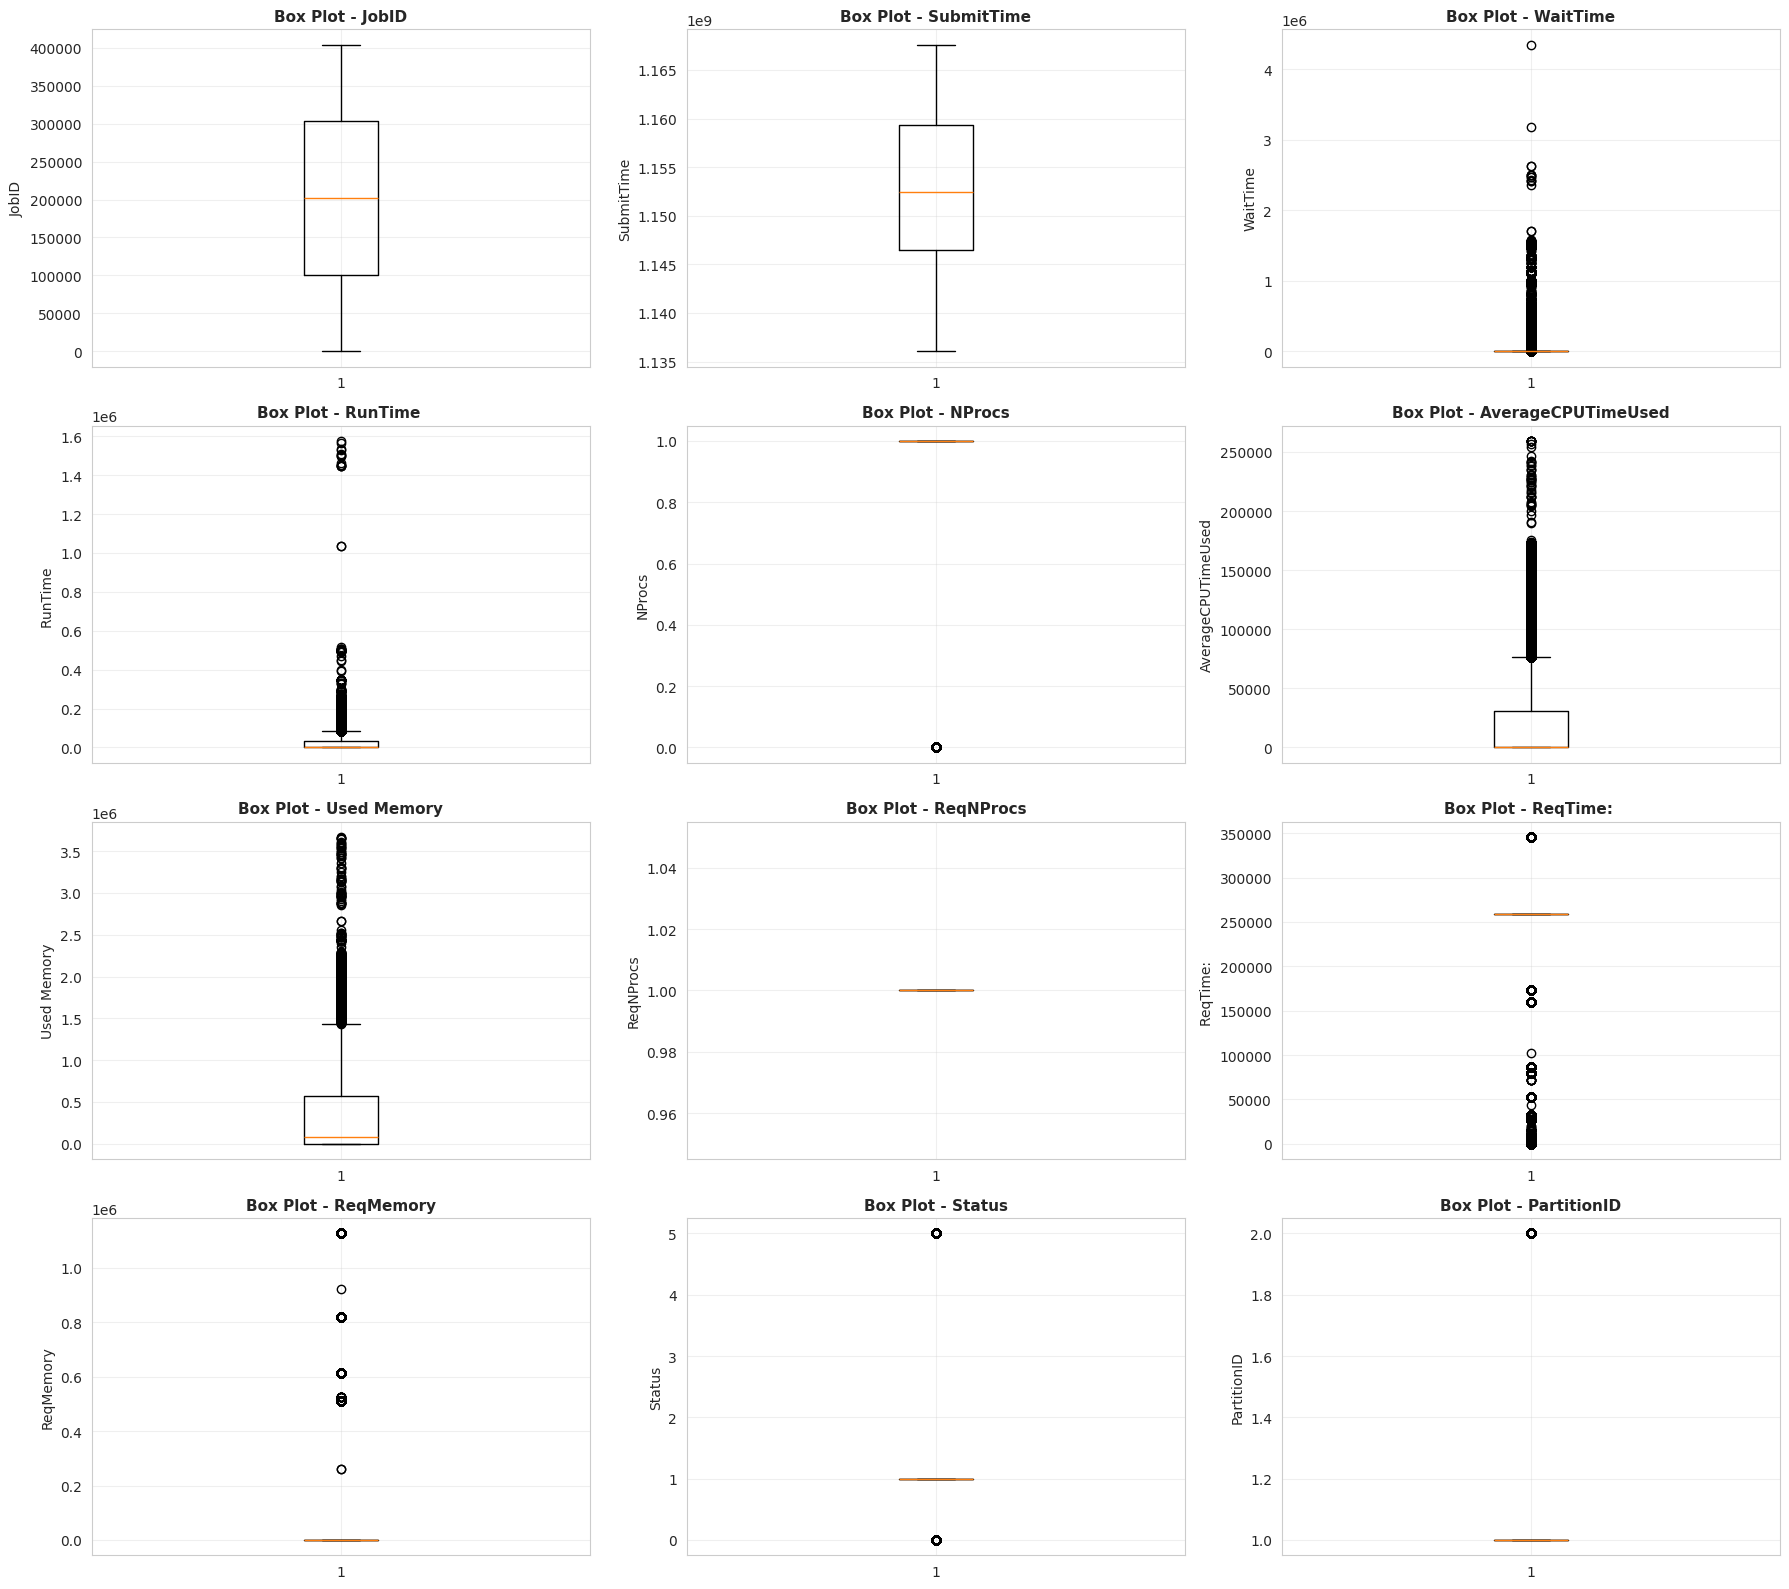


✅ EDA completed successfully!


In [ ]:



print("\n📈 DATA VISUALIZATIONS")
print("-" * 80)

# Missing Values Heatmap
plt.figure(figsize=(16, 8))
msno.matrix(data)
plt.title('Missing Values Pattern', fontsize=16, fontweight='bold')
plt. tight_layout()
plt.show()

# Missing Values Bar Chart
plt.figure(figsize=(16, 6))
msno. bar(data)
plt.title('Missing Values Count by Column', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Target Variable Distribution (assuming RunTime or similar)
# Find the target column (likely RunTime with or without space)
target_cols = [col for col in data.columns if 'runtime' in col.lower() or 'run time' in col.lower()]
if target_cols:
    target_col = target_cols[0]
    print(f"\n🎯 Target Variable: {target_col}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Histogram
    axes[0].hist(data[target_col]. dropna(), bins=50, edgecolor='black', color='skyblue')
    axes[0].set_xlabel(target_col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # Box Plot
    axes[1].boxplot(data[target_col]. dropna(), vert=True)
    axes[1].set_ylabel(target_col, fontsize=12)
    axes[1].set_title(f'Box Plot of {target_col}', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Statistics
    print(f"\n{target_col} Statistics:")
    print(f"  Mean: {data[target_col]. mean():.2f}")
    print(f"  Median: {data[target_col].median():.2f}")
    print(f"  Std Dev: {data[target_col].std():.2f}")
    print(f"  Min: {data[target_col]. min():.2f}")
    print(f"  Max: {data[target_col].max():.2f}")
    print(f"  Skewness: {data[target_col].skew():.2f}")
    print(f"  Kurtosis: {data[target_col].kurtosis():.2f}")

# Numerical Features Distribution
numerical_cols = data.select_dtypes(include=[np.number]).columns. tolist()
print(f"\n📊 Numerical Features: {len(numerical_cols)}")

if len(numerical_cols) > 0:
    num_plots = min(len(numerical_cols), 12)  # Limit to 12 plots
    cols_to_plot = numerical_cols[:num_plots]

    rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
    axes = axes.flatten() if num_plots > 1 else [axes]

    for idx, col in enumerate(cols_to_plot):
        axes[idx].hist(data[col].dropna(), bins=30, edgecolor='black', color='lightcoral')
        axes[idx]. set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Correlation Heatmap
if len(numerical_cols) > 1:
    print("\n🔥 CORRELATION ANALYSIS")
    print("-" * 80)

    correlation_matrix = data[numerical_cols].corr()

    plt.figure(figsize=(16, 12))
    sns. heatmap(correlation_matrix, annot=False, cmap='coolwarm',
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Top correlations with target
    if target_cols:
        target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
        print(f"\n🎯 Top 10 Features Correlated with {target_col}:")
        print(target_correlations.head(11))  # 11 to include target itself

# Categorical Features Analysis
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"\n📊 Categorical Features: {len(categorical_cols)}")

if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Limit to first 5 categorical columns
        print(f"\n{col} - Value Counts:")
        print(data[col].value_counts().head(10))

        if data[col].nunique() <= 20:  # Only plot if not too many categories
            plt.figure(figsize=(12, 5))
            data[col].value_counts().head(15).plot(kind='bar', color='teal', edgecolor='black')
            plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt. xticks(rotation=45, ha='right')
            plt. grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()

# Outlier Detection using Box Plots
print("\n📦 OUTLIER DETECTION")
print("-" * 80)

if len(numerical_cols) > 0:
    num_plots = min(len(numerical_cols), 12)
    cols_to_plot = numerical_cols[:num_plots]

    rows = (num_plots + 2) // 3
    fig, axes = plt. subplots(rows, 3, figsize=(18, rows * 4))
    axes = axes.flatten() if num_plots > 1 else [axes]

    for idx, col in enumerate(cols_to_plot):
        axes[idx].boxplot(data[col].dropna(), vert=True)
        axes[idx].set_ylabel(col, fontsize=10)
        axes[idx].set_title(f'Box Plot - {col}', fontsize=11, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(num_plots, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

print("\n✅ EDA completed successfully!")

# STEP 4: DATA PREPROCESSING

## 4.1 Handle Missing Values
## 4.2 Feature Engineering for Categorical IDs
## 4.3 Handle Remaining Missing Values
## 4.4 Handle Outliers (Optional - using IQR method)

In [ ]:


print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy of the data
df = data.copy()

# Handle column names with trailing spaces
df.columns = df. columns.str.strip()

# Identify target variable
target_cols = [col for col in df. columns if 'runtime' in col.lower()]
if not target_cols:
    print("⚠️ Warning: No 'RunTime' column found.  Please specify the target variable.")
    target_col = df.columns[-1]  # Use last column as target
else:
    target_col = target_cols[0]

print(f"\n🎯 Target Variable: {target_col}")

# -----------------------------
# 4.1 Handle Missing Values
# -----------------------------

print("\n🔧 HANDLING MISSING VALUES")
print("-" * 80)

# Define columns to drop (too many missing values or not useful)
columns_to_drop = ['JobStructure', 'JobStructureParams', 'UsedNetwork',
                   'UsedLocalDiskSpace', 'UsedResources', 'ReqPlatform',
                   'ReqNetwork', 'ReqLocalDiskSpace', 'ReqResources',
                   'VOID', 'ProjectID']

# Drop columns that exist in the dataframe
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if columns_to_drop:
    df.drop(columns_to_drop, axis=1, inplace=True)
    print(f"✅ Dropped {len(columns_to_drop)} columns with too many missing values")

# Handle -1 values (often used to represent missing data)
print("\n🔧 Replacing -1 values with NaN...")
for col in df.select_dtypes(include=[np. number]).columns:
    df[col] = df[col]. replace(-1, np.nan)

# Remove rows with missing target values
df = df.dropna(subset=[target_col])
print(f"✅ Removed rows with missing target values.  New shape: {df.shape}")

# -----------------------------
# 4.2 Feature Engineering for Categorical IDs
# -----------------------------

print("\n🔧 FEATURE ENGINEERING FOR CATEGORICAL VARIABLES")
print("-" * 80)

# Identify ID columns
id_columns = ['UserID', 'QueueID', 'GroupID', 'ExecutableID', 'OrigSiteID', 'LastRunSiteID']
id_columns = [col for col in id_columns if col in df.columns]

# Convert IDs to numerical rankings
for col in id_columns:
    new_col_name = col.replace('ID', 'NO')
    df[new_col_name] = df[col].rank(method='dense', ascending=False). astype(int)
    print(f"✅ Converted {col} to {new_col_name}")

# Drop original ID columns
if id_columns:
    df. drop(id_columns, axis=1, inplace=True)
    print(f"✅ Dropped original ID columns")

# -----------------------------
# 4.3 Handle Remaining Missing Values
# -----------------------------

print("\n🔧 IMPUTING REMAINING MISSING VALUES")
print("-" * 80)

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Identify numerical columns
numerical_features = X.select_dtypes(include=[np.number]).columns. tolist()

# Impute missing values in numerical features with median
if numerical_features:
    imputer = SimpleImputer(strategy='median')
    X[numerical_features] = imputer.fit_transform(X[numerical_features])
    print(f"✅ Imputed missing values in {len(numerical_features)} numerical features")

# Handle categorical features if any
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])
    print(f"✅ Imputed missing values in {len(categorical_features)} categorical features")

# -----------------------------
# 4.4 Handle Outliers (Optional - using IQR method)
# -----------------------------

print("\n🔧 OUTLIER DETECTION AND HANDLING")
print("-" * 80)

def remove_outliers_iqr(data, columns, threshold=1.5):
    """Remove outliers using IQR method"""
    df_clean = data.copy()
    outlier_counts = {}

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col]. quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound))
        outlier_counts[col] = outliers.sum()

    return outlier_counts

outlier_counts = remove_outliers_iqr(X, numerical_features)
print("Outlier counts by feature:")
for col, count in sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {col}: {count} outliers ({count/len(X)*100:.2f}%)")

# Option: Cap outliers instead of removing (more data-preserving)
def cap_outliers(data, columns, threshold=1.5):
    """Cap outliers using IQR method"""
    df_capped = data.copy()

    for col in columns:
        Q1 = df_capped[col].quantile(0.25) # Fixed: removed space
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

# Apply capping (comment out if you don't want this)
X = cap_outliers(X, numerical_features) # Un-commented this line
print("✅ Outliers capped using IQR method") # Un-commented this line


DATA PREPROCESSING

🎯 Target Variable: RunTime

🔧 HANDLING MISSING VALUES
--------------------------------------------------------------------------------
✅ Dropped 11 columns with too many missing values

🔧 Replacing -1 values with NaN...
✅ Removed rows with missing target values.  New shape: (347611, 18)

🔧 FEATURE ENGINEERING FOR CATEGORICAL VARIABLES
--------------------------------------------------------------------------------
✅ Converted UserID to UserNO
✅ Converted QueueID to QueueNO
✅ Converted GroupID to GroupNO
✅ Converted ExecutableID to ExecutableNO
✅ Converted OrigSiteID to OrigSiteNO
✅ Converted LastRunSiteID to LastRunSiteNO
✅ Dropped original ID columns

🔧 IMPUTING REMAINING MISSING VALUES
--------------------------------------------------------------------------------
✅ Imputed missing values in 17 numerical features

🔧 OUTLIER DETECTION AND HANDLING
--------------------------------------------------------------------------------
Outlier counts by feature:
  ReqTime

# 4.5 Train-Test Split

In [ ]:


print("\n🔧 SPLITTING DATA INTO TRAINING AND TESTING SETS")
print("-" * 80)

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print(f"✅ Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Testing set size: {X_test. shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Number of features: {X_train. shape[1]}")

# Save original unscaled data
X_train_original = X_train.copy()
X_test_original = X_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()

print("\n✅ Preprocessing completed successfully!")



🔧 SPLITTING DATA INTO TRAINING AND TESTING SETS
--------------------------------------------------------------------------------
✅ Training set size: 243327 samples (70.0%)
✅ Testing set size: 104284 samples (30.0%)
✅ Number of features: 17

✅ Preprocessing completed successfully!


# STEP 5: FEATURE ENGINEERING AND SCALING

In [ ]:


print("\n" + "="*80)
print("FEATURE ENGINEERING AND SCALING")
print("="*80)

# -----------------------------
# 5.1 Feature Scaling
# -----------------------------

print("\n🔧 FEATURE SCALING")
print("-" * 80)

# Standard Scaler (for models sensitive to scale)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train. columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Standard Scaling applied")

# Robust Scaler (for models sensitive to outliers)
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Convert back to DataFrame
X_train_robust = pd. DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

print("✅ Robust Scaling applied")

# -----------------------------
# 5.2 Feature Engineering
# -----------------------------

print("\n🔧 CREATING ENGINEERED FEATURES")
print("-" * 80)

# Create polynomial and interaction features for specific columns
def create_engineered_features(df):
    """Create additional engineered features"""
    df_eng = df.copy()

    # Example: Create interaction features if memory and CPU columns exist
    memory_cols = [col for col in df. columns if 'memory' in col.lower()]
    cpu_cols = [col for col in df.columns if 'cpu' in col.lower() or 'proc' in col.lower()]

    # Memory-based features
    if len(memory_cols) >= 2:
        df_eng['Memory_Ratio'] = df[memory_cols[0]] / (df[memory_cols[1]] + 1)

    # Statistical features (if applicable)
    # df_eng['Feature_Mean'] = df. mean(axis=1)
    # df_eng['Feature_Std'] = df.std(axis=1)
    # df_eng['Feature_Max'] = df.max(axis=1)
    # df_eng['Feature_Min'] = df. min(axis=1)

    return df_eng

# Apply feature engineering to both scaled versions
X_train_engineered = create_engineered_features(X_train_scaled)
X_test_engineered = create_engineered_features(X_test_scaled)

print(f"✅ Feature engineering completed")
print(f"✅ Original features: {X_train.shape[1]}")
print(f"✅ Engineered features: {X_train_engineered.shape[1]}")

# We'll use the standard scaled version for most models
X_train_final = X_train_scaled
X_test_final = X_test_scaled

print("\n✅ Feature engineering and scaling completed successfully!")


FEATURE ENGINEERING AND SCALING

🔧 FEATURE SCALING
--------------------------------------------------------------------------------
✅ Standard Scaling applied
✅ Robust Scaling applied

🔧 CREATING ENGINEERED FEATURES
--------------------------------------------------------------------------------
✅ Feature engineering completed
✅ Original features: 17
✅ Engineered features: 18

✅ Feature engineering and scaling completed successfully!


# STEP 6: INITIALIZE ALL MODELS

In [ ]:


print("\n" + "="*80)
print("MODEL INITIALIZATION")
print("="*80)

# Dictionary to store all models
models = {}

# -----------------------------
# Linear Models
# -----------------------------
print("\n📌 Initializing Linear Models...")
models['Linear Regression'] = LinearRegression()
models['Ridge Regression'] = Ridge(alpha=1.0, random_state=42)
models['Lasso Regression'] = Lasso(alpha=1.0, random_state=42)
models['ElasticNet'] = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# -----------------------------
# Tree-Based Models
# -----------------------------
print("📌 Initializing Tree-Based Models...")
models['Decision Tree'] = DecisionTreeRegressor(max_depth=10, random_state=42)
models['Random Forest'] = RandomForestRegressor(
    n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
)

# -----------------------------
# Boosting Models
# -----------------------------
print("📌 Initializing Boosting Models...")
models['Gradient Boosting'] = GradientBoostingRegressor(
    n_estimators=100, max_depth=5, random_state=42
)
models['AdaBoost'] = AdaBoostRegressor(
    n_estimators=100, random_state=42
)
models['XGBoost'] = XGBRegressor(
    n_estimators=100, max_depth=5, random_state=42, n_jobs=-1
)
models['LightGBM'] = LGBMRegressor(
    n_estimators=100, max_depth=5, random_state=42, n_jobs=-1, verbose=-1
)

# -----------------------------
# Instance-Based Models
# -----------------------------
print("📌 Initializing Instance-Based Models...")
models['K-Nearest Neighbors'] = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)



# -----------------------------
# Neural Networks
# -----------------------------
print("📌 Initializing Neural Network...")
models['Multi-Layer Perceptron'] = MLPRegressor(
    hidden_layer_sizes=(100, 50), max_iter=500, random_state=42
)

print(f"\n✅ Total models initialized: {len(models)}")
for model_name in models. keys():
    print(f"   ✓ {model_name}")

print("\n✅ Model initialization completed successfully!")


MODEL INITIALIZATION

📌 Initializing Linear Models...
📌 Initializing Tree-Based Models...
📌 Initializing Boosting Models...
📌 Initializing Instance-Based Models...
📌 Initializing Neural Network...

✅ Total models initialized: 12
   ✓ Linear Regression
   ✓ Ridge Regression
   ✓ Lasso Regression
   ✓ ElasticNet
   ✓ Decision Tree
   ✓ Random Forest
   ✓ Gradient Boosting
   ✓ AdaBoost
   ✓ XGBoost
   ✓ LightGBM
   ✓ K-Nearest Neighbors
   ✓ Multi-Layer Perceptron

✅ Model initialization completed successfully!


# STEP 7: TRAIN ALL MODELS


MODEL TRAINING

🚀 Starting model training.. .

Training: Linear Regression
✅ Linear Regression trained successfully in 0.13 seconds

Training: Ridge Regression
✅ Ridge Regression trained successfully in 0.13 seconds

Training: Lasso Regression
✅ Lasso Regression trained successfully in 1.23 seconds

Training: ElasticNet
✅ ElasticNet trained successfully in 0.18 seconds

Training: Decision Tree
✅ Decision Tree trained successfully in 2.80 seconds

Training: Random Forest
✅ Random Forest trained successfully in 122.75 seconds

Training: Gradient Boosting
✅ Gradient Boosting trained successfully in 134.54 seconds

Training: AdaBoost
✅ AdaBoost trained successfully in 6.51 seconds

Training: XGBoost
✅ XGBoost trained successfully in 1.66 seconds

Training: LightGBM
❌ Error training LightGBM: Do not support special JSON characters in feature name.

Training: K-Nearest Neighbors
✅ K-Nearest Neighbors trained successfully in 0.01 seconds

Training: Multi-Layer Perceptron
✅ Multi-Layer Percep

,Model,Training Time (seconds)
10,K-Nearest Neighbors,0.014917
1,Ridge Regression,0.128108
0,Linear Regression,0.133771
3,ElasticNet,0.181341
2,Lasso Regression,1.230742
8,XGBoost,1.661043
4,Decision Tree,2.804325
7,AdaBoost,6.512100
5,Random Forest,122.746287
6,Gradient Boosting,134.539129


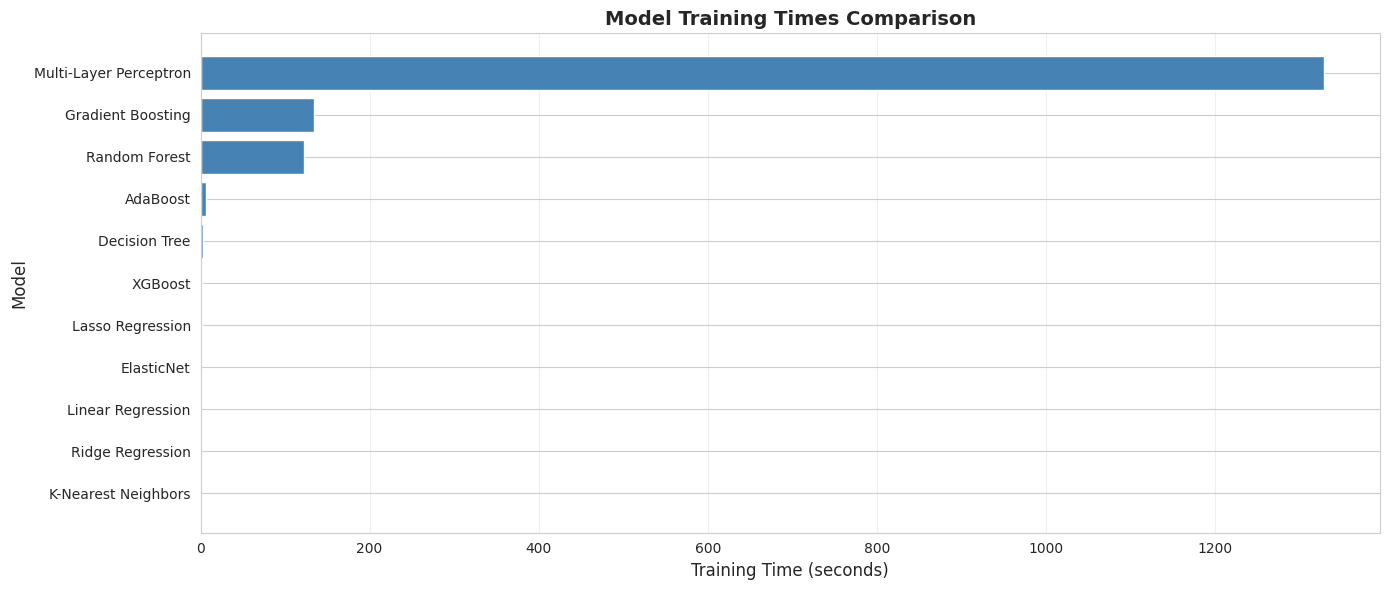


✅ Model training completed successfully!


In [ ]:


print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

import time

# Dictionary to store training times
training_times = {}

# Dictionary to store trained models
trained_models = {}

print("\n🚀 Starting model training.. .\n")

for model_name, model in models. items():
    print(f"{'='*80}")
    print(f"Training: {model_name}")
    print(f"{'='*80}")

    start_time = time.time()

    try:
        # Train the model
        model.fit(X_train_final, y_train)

        end_time = time.time()
        training_time = end_time - start_time
        training_times[model_name] = training_time
        trained_models[model_name] = model

        print(f"✅ {model_name} trained successfully in {training_time:.2f} seconds")

    except Exception as e:
        print(f"❌ Error training {model_name}: {str(e)}")
        training_times[model_name] = None
        trained_models[model_name] = None

    print()

print(f"\n{'='*80}")
print("TRAINING SUMMARY")
print(f"{'='*80}")

# Display training times
training_df = pd.DataFrame({
    'Model': list(training_times.keys()),
    'Training Time (seconds)': list(training_times. values())
}).sort_values('Training Time (seconds)')

display(training_df)

# Visualize training times
plt.figure(figsize=(14, 6))
training_df_clean = training_df[training_df['Training Time (seconds)']. notna()]
plt.barh(training_df_clean['Model'], training_df_clean['Training Time (seconds)'], color='steelblue')
plt.xlabel('Training Time (seconds)', fontsize=12)
plt. ylabel('Model', fontsize=12)
plt.title('Model Training Times Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Model training completed successfully!")

# STEP 8: EVALUATE AND VISUALIZE ALL MODELS


MODEL EVALUATION

  Evaluating models on training and testing sets...

Evaluating: Linear Regression
✅ Linear Regression evaluated successfully
   Training R: 0.6928
   Testing R:  0.7032

Evaluating: Ridge Regression
✅ Ridge Regression evaluated successfully
   Training R: 0.6928
   Testing R:  0.7032

Evaluating: Lasso Regression
✅ Lasso Regression evaluated successfully
   Training R: 0.6928
   Testing R:  0.7032

Evaluating: ElasticNet
✅ ElasticNet evaluated successfully
   Training R: 0.6155
   Testing R:  0.6234

Evaluating: Decision Tree
✅ Decision Tree evaluated successfully
   Training R: 0.8560
   Testing R:  0.8246

Evaluating: Random Forest
✅ Random Forest evaluated successfully
   Training R: 0.8751
   Testing R:  0.8477

Evaluating: Gradient Boosting
✅ Gradient Boosting evaluated successfully
   Training R: 0.8472
   Testing R:  0.8323

Evaluating: AdaBoost
✅ AdaBoost evaluated successfully
   Training R: 0.6828
   Testing R:  0.6495

Evaluating: XGBoost


,Model,Dataset,MSE,RMSE,MAE,R Score,Adjusted R,MAPE (%),Explained Variance
18,K-Nearest Neighbors,Training,1.941247e+08,13932.864658,2264.323965,0.883142,0.883134,1589.139639,0.883145
16,XGBoost,Training,1.970921e+08,14038.950812,3475.183379,0.881356,0.881347,10139.445133,0.881356
10,Random Forest,Training,2.075026e+08,14404.950423,3203.338940,0.875089,0.875080,7822.410209,0.875090
8,Decision Tree,Training,2.392376e+08,15467.307834,3252.485154,0.855985,0.855975,6708.226795,0.855985
12,Gradient Boosting,Training,2.539065e+08,15934.443658,3857.023684,0.847155,0.847144,9962.404836,0.847155
20,Multi-Layer Perceptron,Training,3.873357e+08,19680.846924,5449.879146,0.766834,0.766818,12061.543734,0.766837
0,Linear Regression,Training,5.102695e+08,22589.145765,6775.411877,0.692831,0.692810,12283.312212,0.692831
2,Ridge Regression,Training,5.102695e+08,22589.145766,6775.406489,0.692831,0.692810,12283.509782,0.692831
4,Lasso Regression,Training,5.102699e+08,22589.155330,6774.945596,0.692831,0.692810,12299.207908,0.692831
14,AdaBoost,Training,5.269940e+08,22956.350213,9481.054931,0.682764,0.682741,53987.733571,0.687758



📊 TESTING SET RESULTS
--------------------------------------------------------------------------------


,Model,Dataset,MSE,RMSE,MAE,R Score,Adjusted R,MAPE (%),Explained Variance
17,XGBoost,Testing,2.248899e+08,14996.330303,3629.956950,0.865114,0.865092,11204.910267,0.865115
11,Random Forest,Testing,2.538504e+08,15932.682366,3457.234993,0.847744,0.847720,8100.377988,0.847749
19,K-Nearest Neighbors,Testing,2.603595e+08,16135.660138,2867.872289,0.843840,0.843815,2992.832768,0.843844
13,Gradient Boosting,Testing,2.795184e+08,16718.803142,4010.621543,0.832349,0.832322,10066.688092,0.832350
9,Decision Tree,Testing,2.924921e+08,17102.399217,3518.139651,0.824568,0.824539,7777.578011,0.824570
21,Multi-Layer Perceptron,Testing,3.626509e+08,19043.395362,5551.703791,0.782487,0.782452,12103.601786,0.782506
1,Linear Regression,Testing,4.948042e+08,22244.194630,6913.862329,0.703224,0.703176,12067.918259,0.703234
3,Ridge Regression,Testing,4.948042e+08,22244.195693,6913.856871,0.703224,0.703175,12068.118622,0.703233
5,Lasso Regression,Testing,4.948072e+08,22244.261668,6913.458492,0.703222,0.703174,12084.648086,0.703232
15,AdaBoost,Testing,5.844518e+08,24175.437153,9666.912866,0.649455,0.649397,54749.478470,0.654136



➗ VISUALIZING MODEL PERFORMANCE
--------------------------------------------------------------------------------


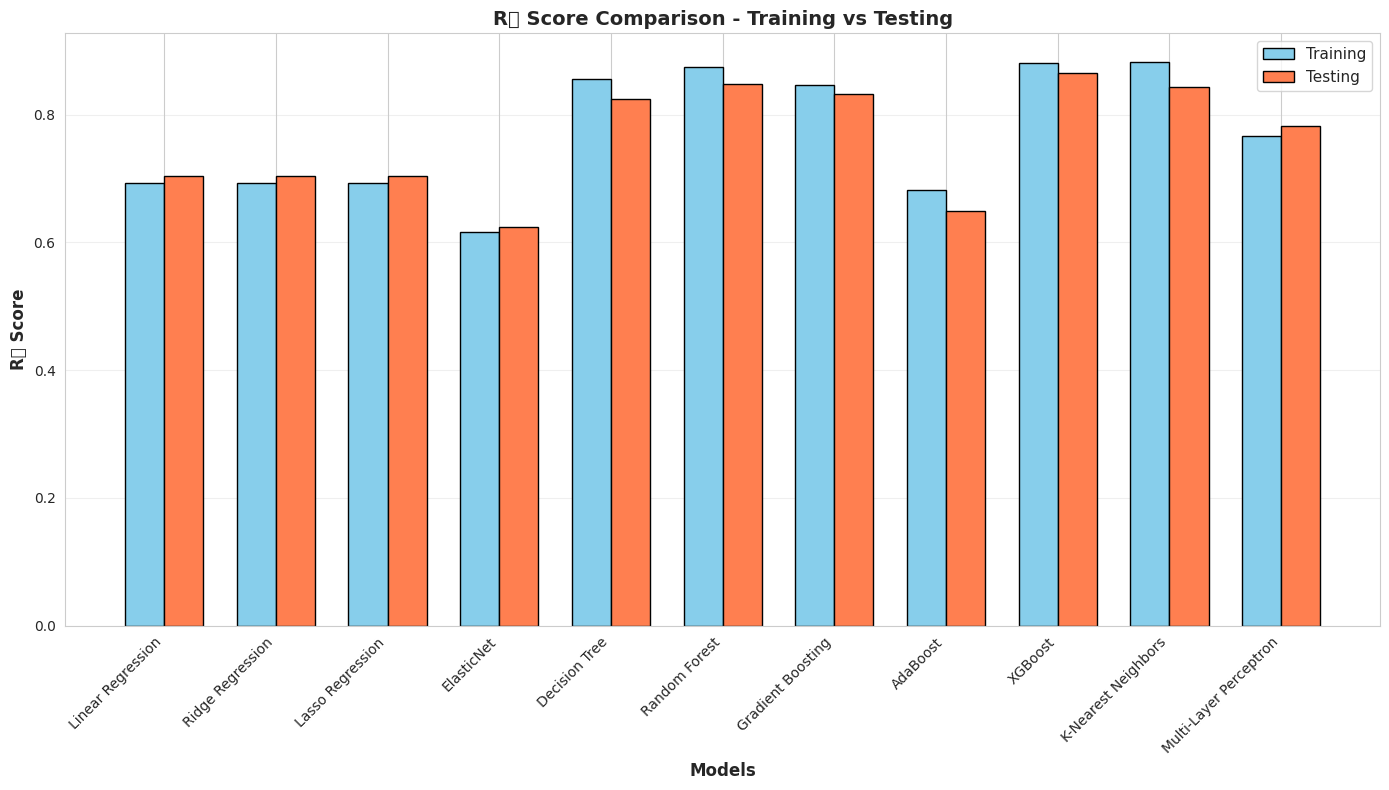

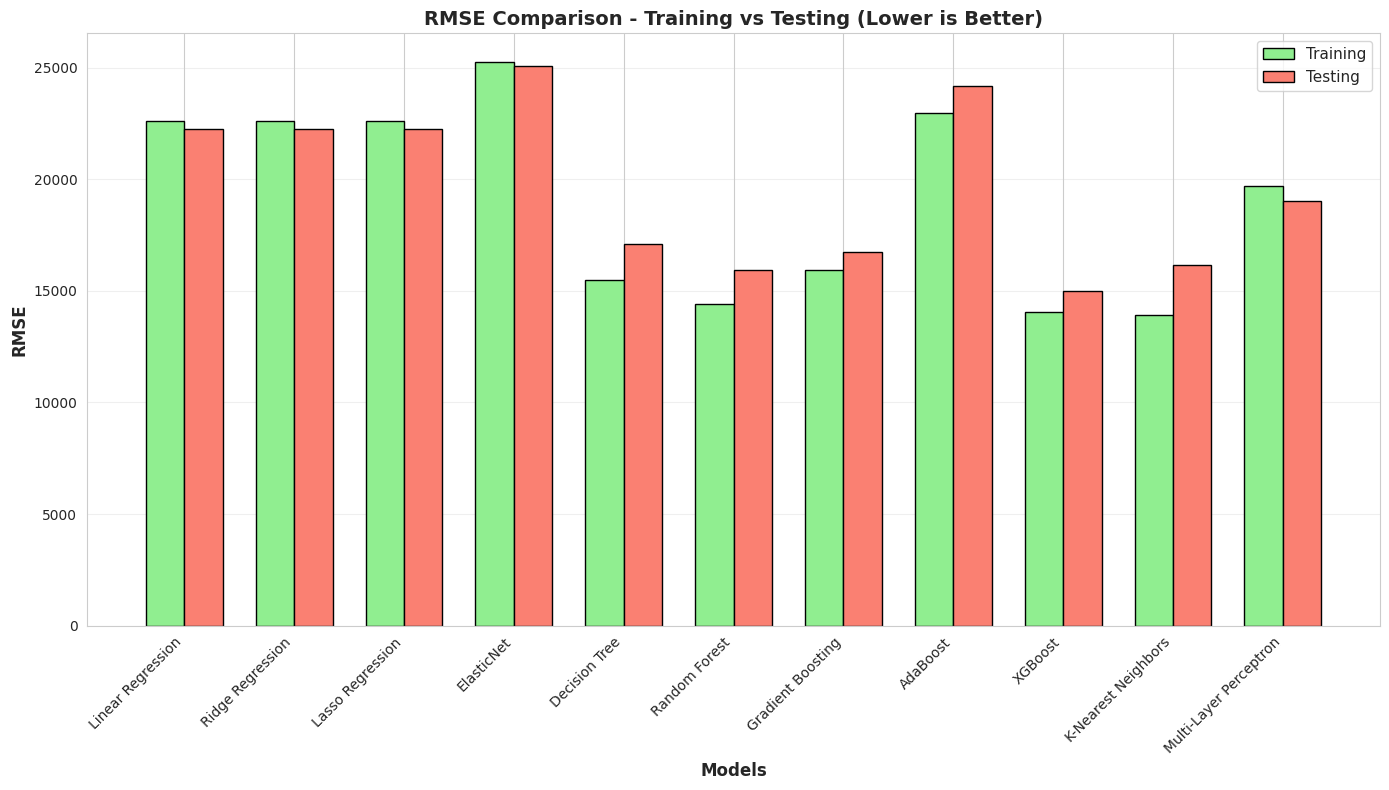

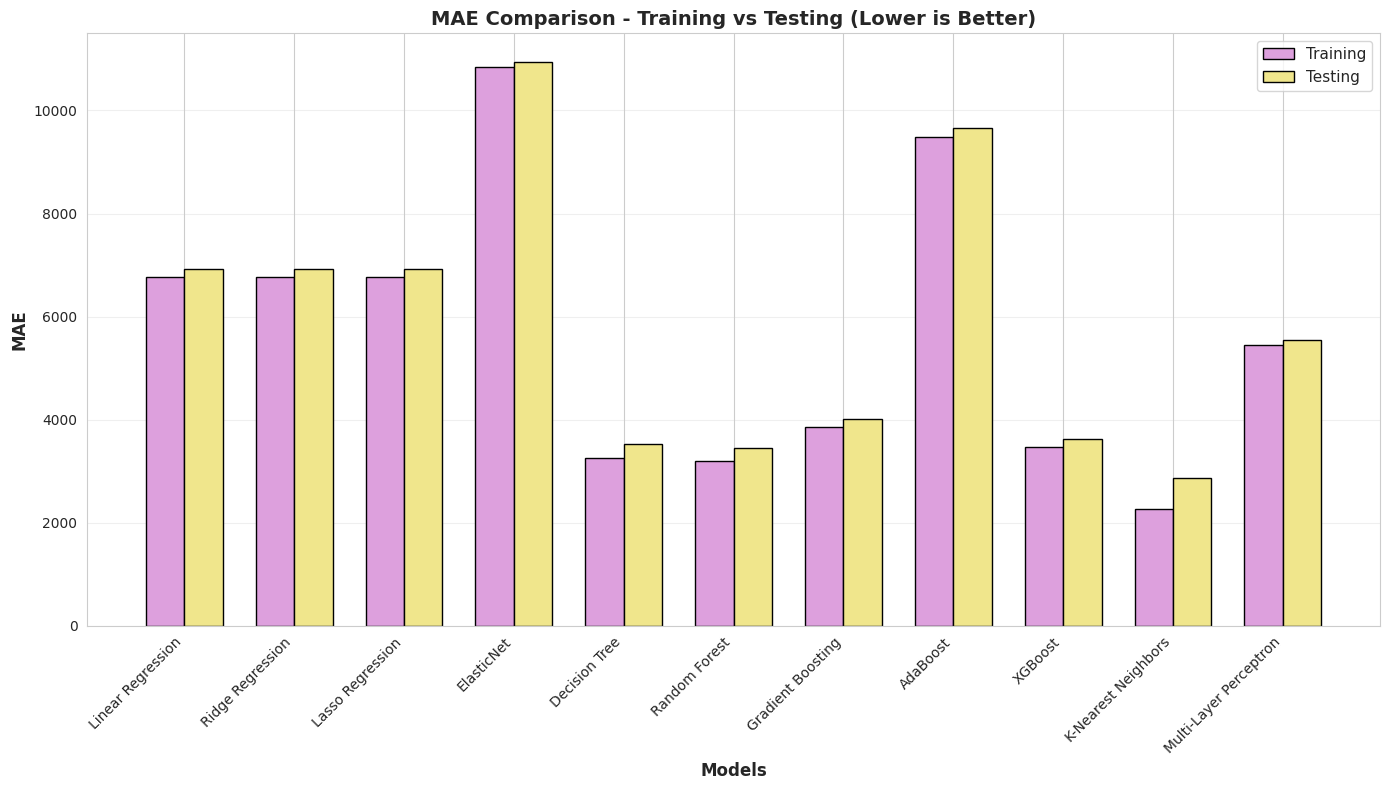

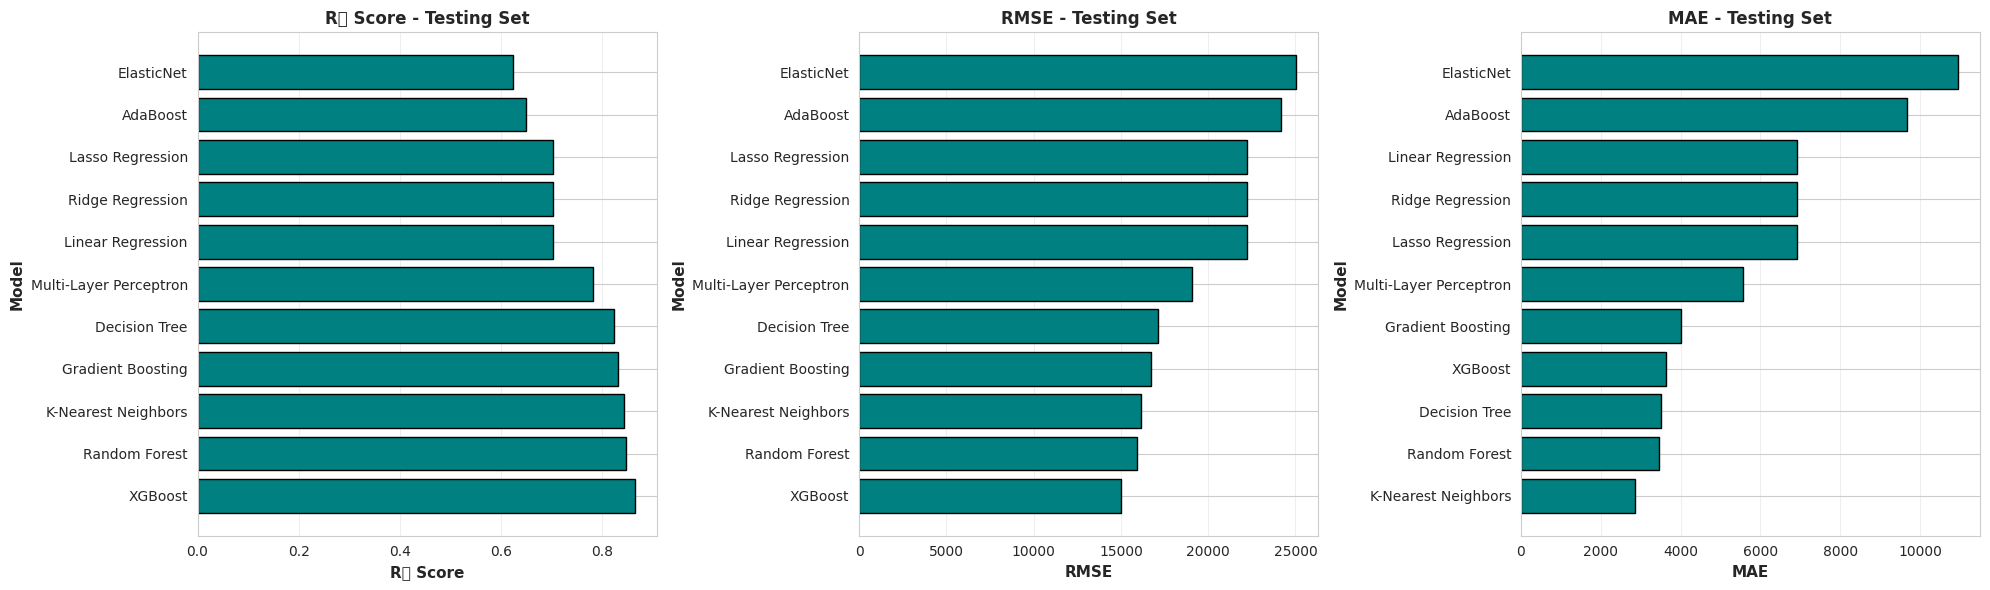

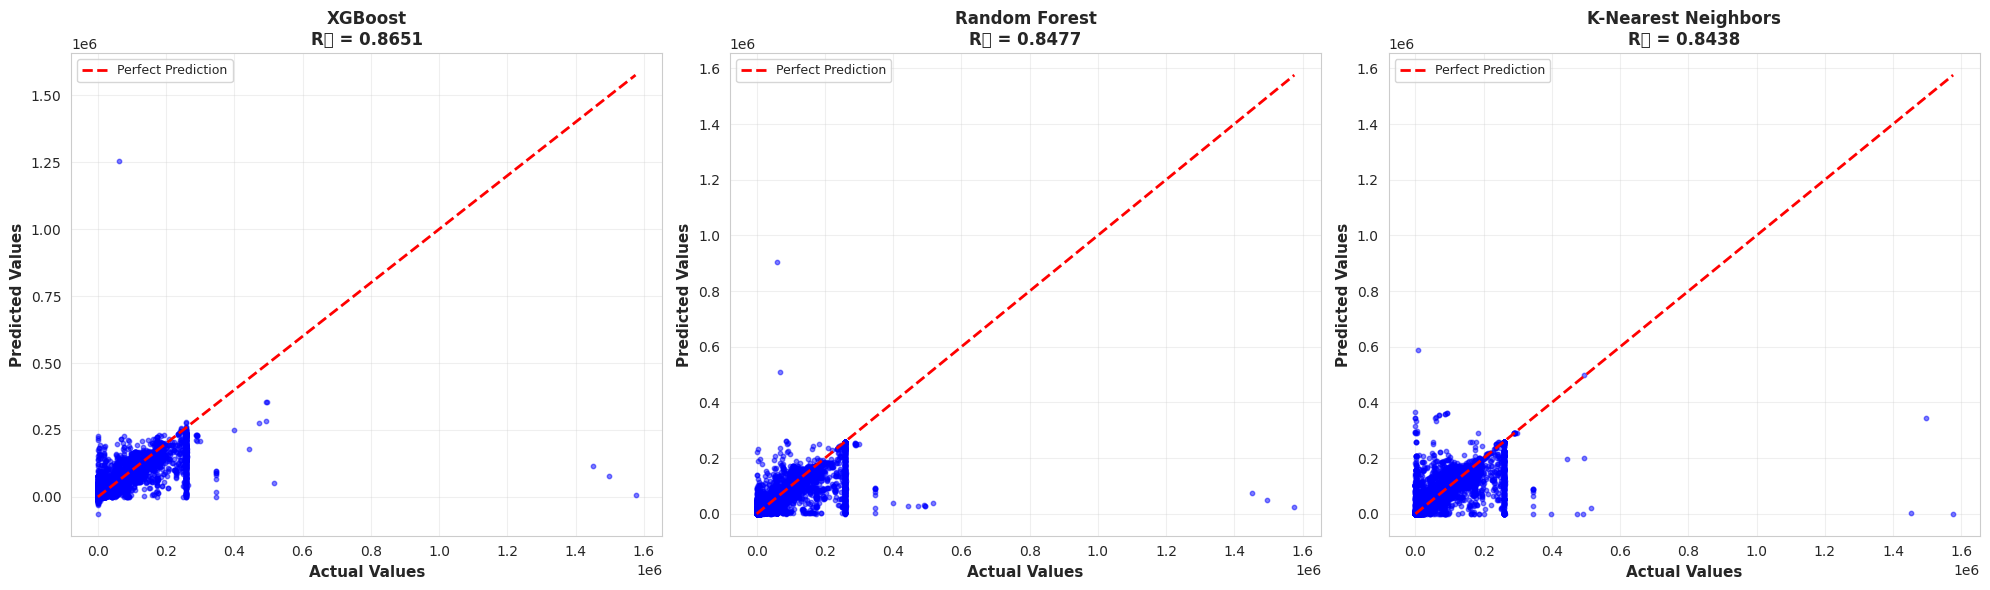

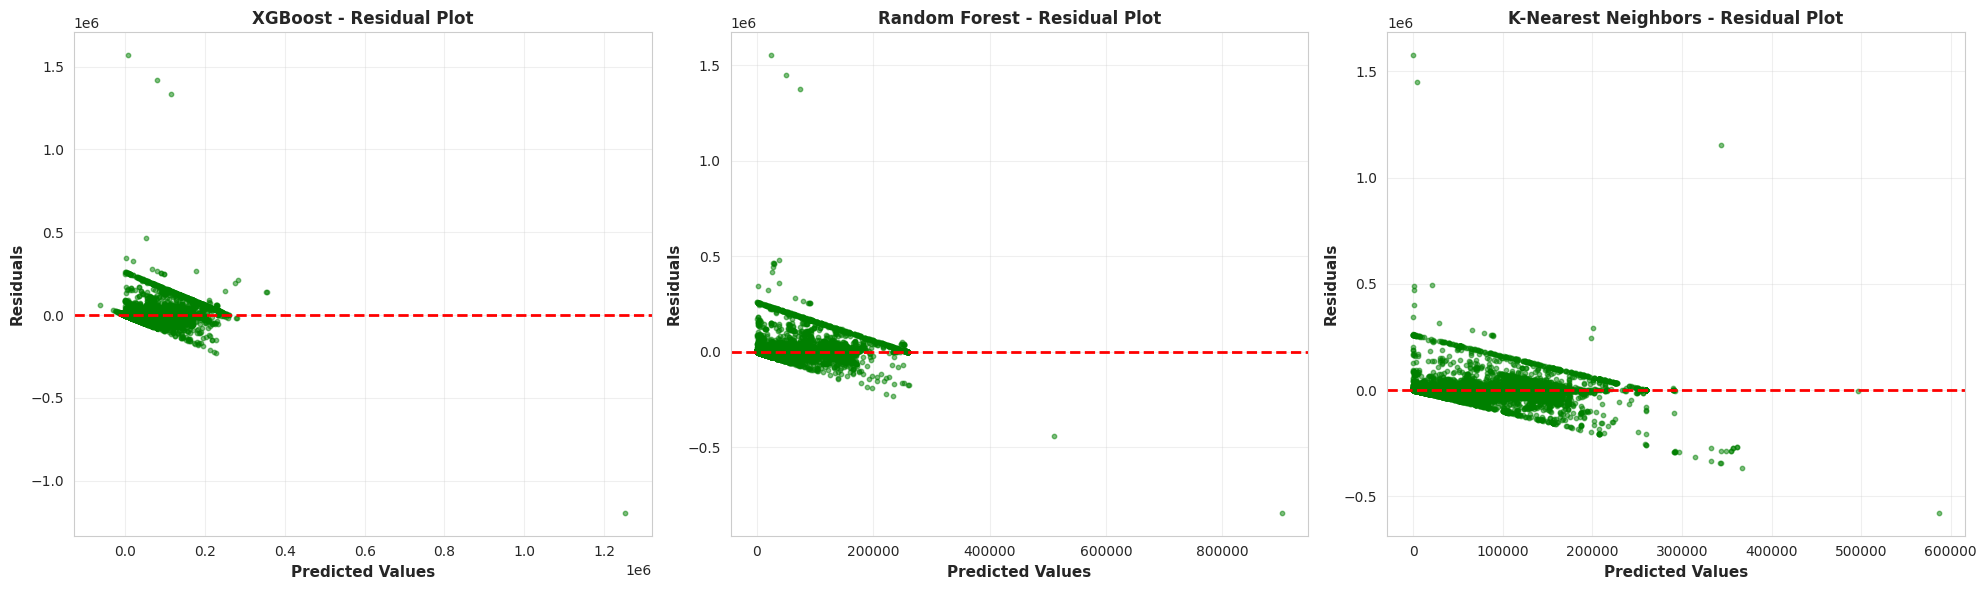

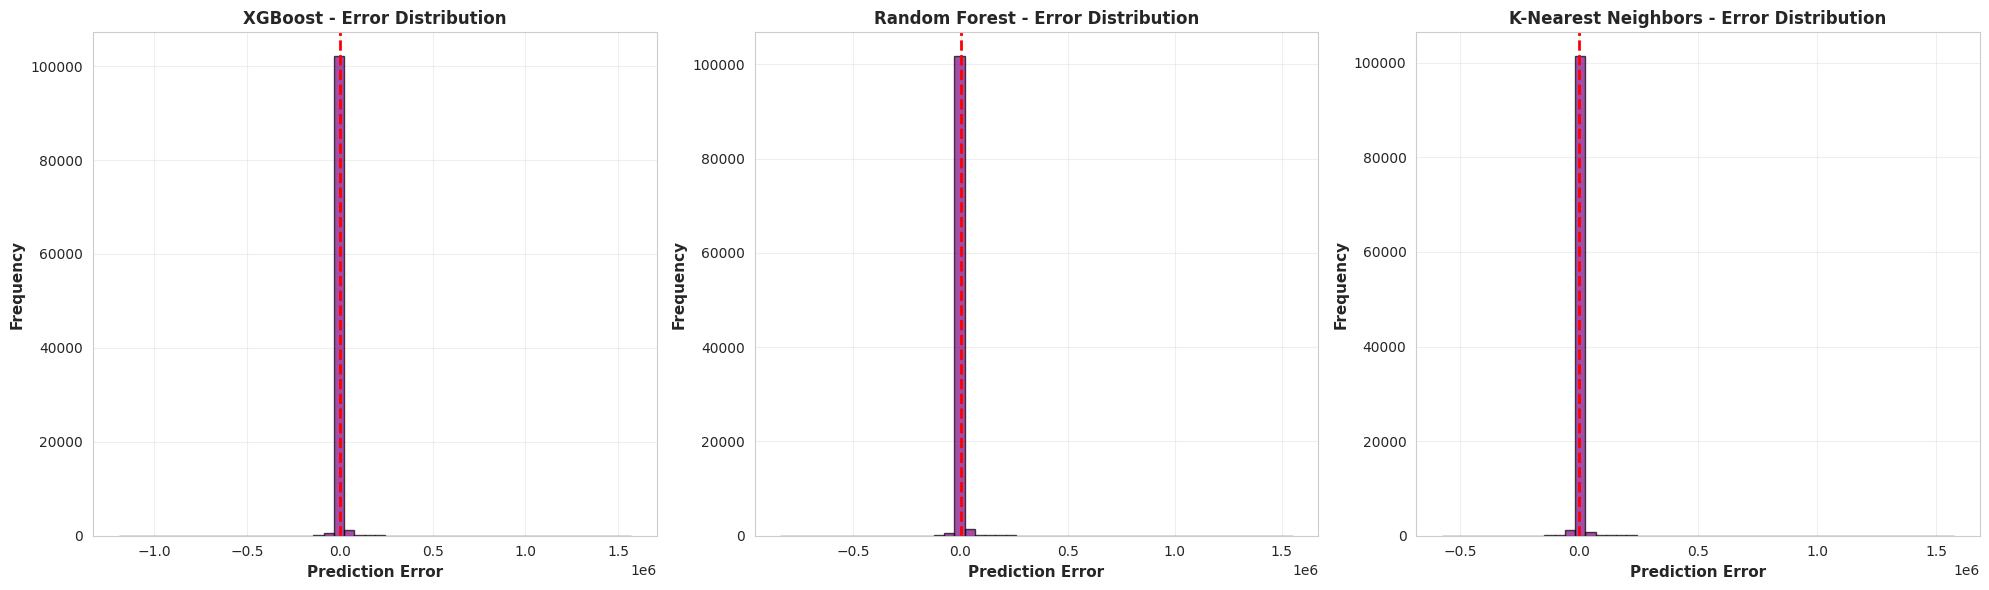


✅ Model evaluation and visualization completed successfully!


In [ ]:


print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

# Function to calculate all regression metrics
def calculate_metrics(y_true, y_pred, model_name, dataset_type):
    """Calculate comprehensive regression metrics"""

    try:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        # Adjusted R (requires number of features)
        n = len(y_true)
        p = X_train_final.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        # MAPE (Mean Absolute Percentage Error)
        # Avoid division by zero
        mask = y_true != 0
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if mask.sum() > 0 else np.inf

        # Explained Variance Score
        evs = explained_variance_score(y_true, y_pred)

        return {
            'Model': model_name,
            'Dataset': dataset_type,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R Score': r2,
            'Adjusted R': adj_r2,
            'MAPE (%)': mape,
            'Explained Variance': evs
        }
    except Exception as e:
        print(f"Error calculating metrics for {model_name} on {dataset_type}: {str(e)}")
        return None

# Store all results
results = []
predictions = {}

print("\n  Evaluating models on training and testing sets...\n")

for model_name, model in trained_models. items():
    if model is None:
        continue

    print(f"{'='*80}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*80}")

    try:
        # Training set predictions
        y_train_pred = model.predict(X_train_final)
        train_metrics = calculate_metrics(y_train, y_train_pred, model_name, 'Training')
        if train_metrics:
            results. append(train_metrics)

        # Testing set predictions
        y_test_pred = model. predict(X_test_final)
        test_metrics = calculate_metrics(y_test, y_test_pred, model_name, 'Testing')
        if test_metrics:
            results.append(test_metrics)

        # Store predictions
        predictions[model_name] = {
            'train': y_train_pred,
            'test': y_test_pred
        }

        print(f"✅ {model_name} evaluated successfully")
        print(f"   Training R: {train_metrics['R Score']:.4f}")
        print(f"   Testing R:  {test_metrics['R Score']:.4f}")

    except Exception as e:
        print(f"❌ Error evaluating {model_name}: {str(e)}")

    print()

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display results
print(f"\n{'='*80}")
print("EVALUATION RESULTS - ALL MODELS")
print(f"{'='*80}\n")

# Training Results
print("📊 TRAINING SET RESULTS")
print("-" * 80)
training_results = results_df[results_df['Dataset'] == 'Training']. sort_values('R Score', ascending=False)
display(training_results)

print("\n📊 TESTING SET RESULTS")
print("-" * 80)
testing_results = results_df[results_df['Dataset'] == 'Testing'].sort_values('R Score', ascending=False)
display(testing_results)

# -----------------------------
# Visualization of Results
# -----------------------------

print("\n➗ VISUALIZING MODEL PERFORMANCE")
print("-" * 80)

# Prepare data for visualization
train_results = results_df[results_df['Dataset'] == 'Training']. set_index('Model')
test_results = results_df[results_df['Dataset'] == 'Testing'].set_index('Model')

# 1. R Score Comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

x = np.arange(len(train_results))
width = 0.35

bars1 = ax.bar(x - width/2, train_results['R Score'], width, label='Training', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, test_results['R Score'], width, label='Testing', color='coral', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax. set_ylabel('R Score', fontsize=12, fontweight='bold')
ax.set_title('R Score Comparison - Training vs Testing', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax. set_xticklabels(train_results.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt. show()

# 2.  RMSE Comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

bars1 = ax.bar(x - width/2, train_results['RMSE'], width, label='Training', color='lightgreen', edgecolor='black')
bars2 = ax.bar(x + width/2, test_results['RMSE'], width, label='Testing', color='salmon', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax.set_title('RMSE Comparison - Training vs Testing (Lower is Better)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(train_results.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3.  MAE Comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

bars1 = ax.bar(x - width/2, train_results['MAE'], width, label='Training', color='plum', edgecolor='black')
bars2 = ax.bar(x + width/2, test_results['MAE'], width, label='Testing', color='khaki', edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax.set_title('MAE Comparison - Training vs Testing (Lower is Better)', fontsize=14, fontweight='bold')
ax. set_xticks(x)
ax.set_xticklabels(train_results.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Multiple Metrics Comparison (Testing Set Only)
metrics_to_plot = ['R Score', 'RMSE', 'MAE']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, metric in enumerate(metrics_to_plot):
    test_results_sorted = test_results. sort_values(metric, ascending=(metric != 'R Score'))

    axes[idx].barh(test_results_sorted. index, test_results_sorted[metric], color='teal', edgecolor='black')
    axes[idx].set_xlabel(metric, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Model', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{metric} - Testing Set', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 5.  Actual vs Predicted (Top 3 Models)
top_3_models = test_results.nlargest(3, 'R Score'). index. tolist()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, model_name in enumerate(top_3_models):
    y_pred = predictions[model_name]['test']

    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=10, color='blue')
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                   'r--', lw=2, label='Perfect Prediction')

    axes[idx].set_xlabel('Actual Values', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Values', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{model_name}\nR = {test_results.loc[model_name, "R Score"]:.4f}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Residual Plots (Top 3 Models)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, model_name in enumerate(top_3_models):
    y_pred = predictions[model_name]['test']
    residuals = y_test - y_pred

    axes[idx].scatter(y_pred, residuals, alpha=0.5, s=10, color='green')
    axes[idx]. axhline(y=0, color='r', linestyle='--', linewidth=2)

    axes[idx].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Residuals', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{model_name} - Residual Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Error Distribution (Top 3 Models)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, model_name in enumerate(top_3_models):
    y_pred = predictions[model_name]['test']
    errors = y_test - y_pred

    axes[idx]. hist(errors, bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[idx].axvline(x=0, color='r', linestyle='--', linewidth=2)

    axes[idx].set_xlabel('Prediction Error', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{model_name} - Error Distribution', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model evaluation and visualization completed successfully!")

# STEP 9: COMPARATIVE ANALYSIS OF MODELS


COMPARATIVE ANALYSIS OF MODELS

📊 PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

🏆 BEST MODELS BY METRIC (Testing Set)
--------------------------------------------------------------------------------

R Score:
  Best Model: XGBoost
  Score: 0.8651

RMSE:
  Best Model: XGBoost
  Score: 14996.3303

MAE:
  Best Model: K-Nearest Neighbors
  Score: 2867.8723

MAPE (%):
  Best Model: K-Nearest Neighbors
  Score: 2992.8328

Explained Variance:
  Best Model: XGBoost
  Score: 0.8651


🔍 OVERFITTING ANALYSIS
--------------------------------------------------------------------------------


,Model,Training R,Testing R,R Difference,Overfitting (%)
10,Multi-Layer Perceptron,0.766834,0.782487,-0.015653,-2.041285
0,Linear Regression,0.692831,0.703224,-0.010393,-1.500016
1,Ridge Regression,0.692831,0.703224,-0.010393,-1.500012
2,Lasso Regression,0.692831,0.703222,-0.010391,-1.499796
3,ElasticNet,0.615501,0.623387,-0.007885,-1.281140
6,Gradient Boosting,0.847155,0.832349,0.014806,1.747726
8,XGBoost,0.881356,0.865114,0.016241,1.842770
5,Random Forest,0.875089,0.847744,0.027345,3.124777
4,Decision Tree,0.855985,0.824568,0.031418,3.670349
9,K-Nearest Neighbors,0.883142,0.843840,0.039302,4.450224


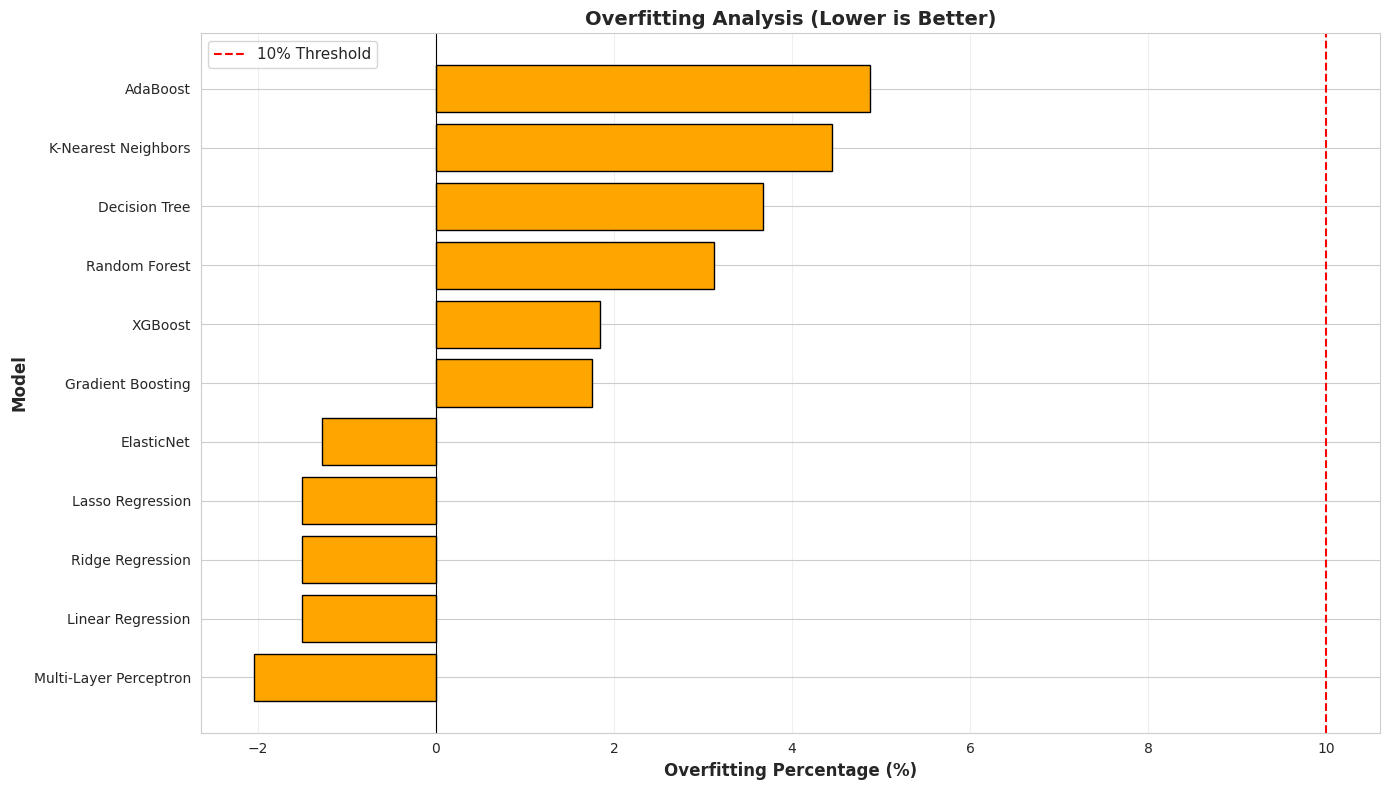



🏅 OVERALL MODEL RANKING
--------------------------------------------------------------------------------

Final Model Rankings (Considering Performance + Training Time):


,Rank,Overall_Score_with_Time,Training_Time
Model,,,
XGBoost,1,0.971589,1.661043
K-Nearest Neighbors,2,0.939628,0.014917
Random Forest,3,0.919411,122.746287
Decision Tree,4,0.862538,2.804325
Gradient Boosting,5,0.855437,134.539129
Multi-Layer Perceptron,6,0.577169,1328.604622
Ridge Regression,7,0.432794,0.128108
Linear Regression,8,0.432794,0.133771
Lasso Regression,9,0.432722,1.230742


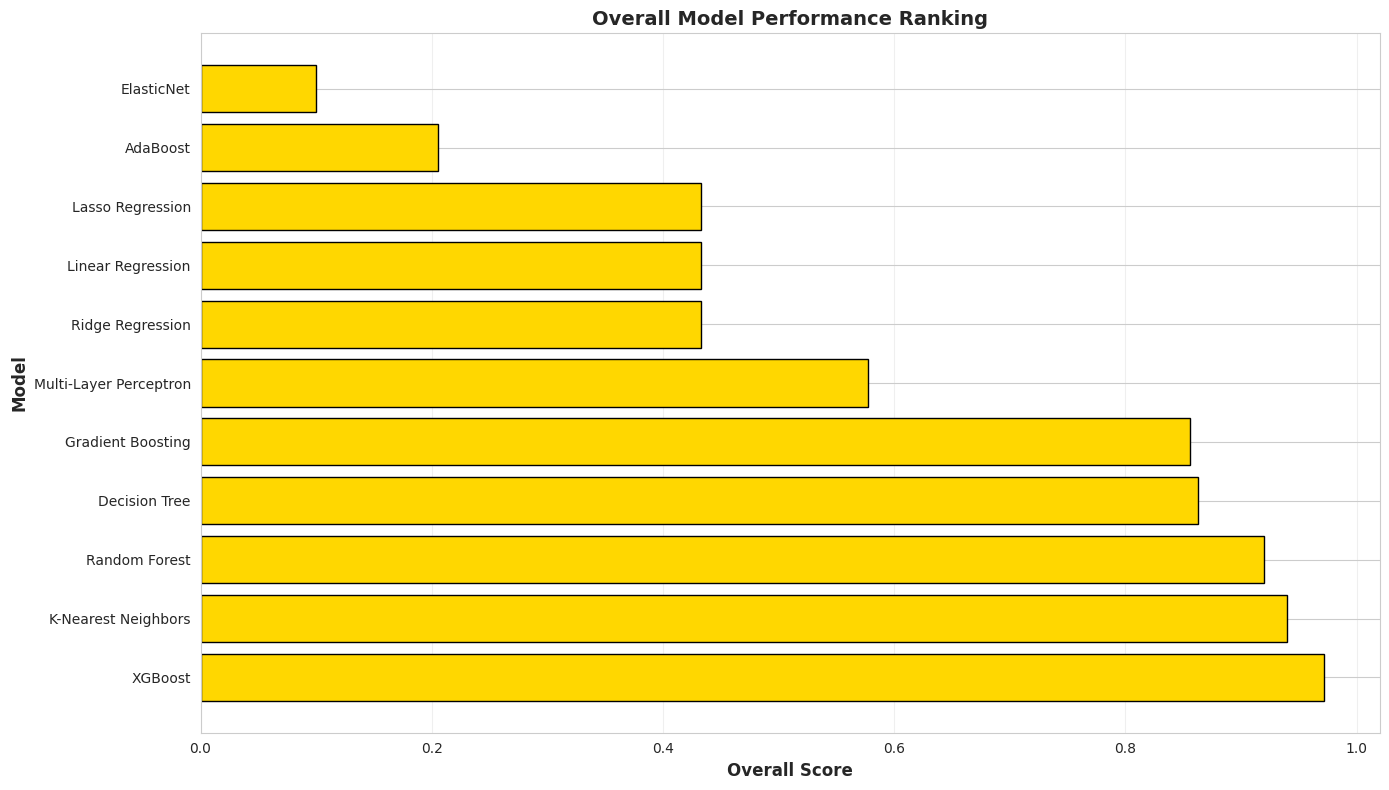



📈 STATISTICAL COMPARISON
--------------------------------------------------------------------------------

Summary Statistics (Testing Set):


,R Score,RMSE,MAE
count,11.000000,11.000000,11.000000
mean,0.761692,19626.870157,5853.970093
std,0.087298,3649.495520,2691.292985
min,0.623387,14996.330303,2867.872289
25%,0.703223,16427.231640,3574.048300
50%,0.782487,19043.395362,5551.703791
75%,0.838095,22244.228680,6913.859600
max,0.865114,25058.212054,10950.051252




⚙️ MODEL COMPLEXITY vs PERFORMANCE
--------------------------------------------------------------------------------

Model Complexity Analysis:


,Model,Complexity,R Score,Training Time (s)
0,Linear Regression,Low,0.703224,0.133771
1,Ridge Regression,Low,0.703224,0.128108
2,Lasso Regression,Low,0.703222,1.230742
3,ElasticNet,Low,0.623387,0.181341
4,Decision Tree,Medium,0.824568,2.804325
5,Random Forest,High,0.847744,122.746287
6,Gradient Boosting,High,0.832349,134.539129
7,AdaBoost,High,0.649455,6.512100
8,XGBoost,High,0.865114,1.661043
9,K-Nearest Neighbors,Medium,0.843840,0.014917


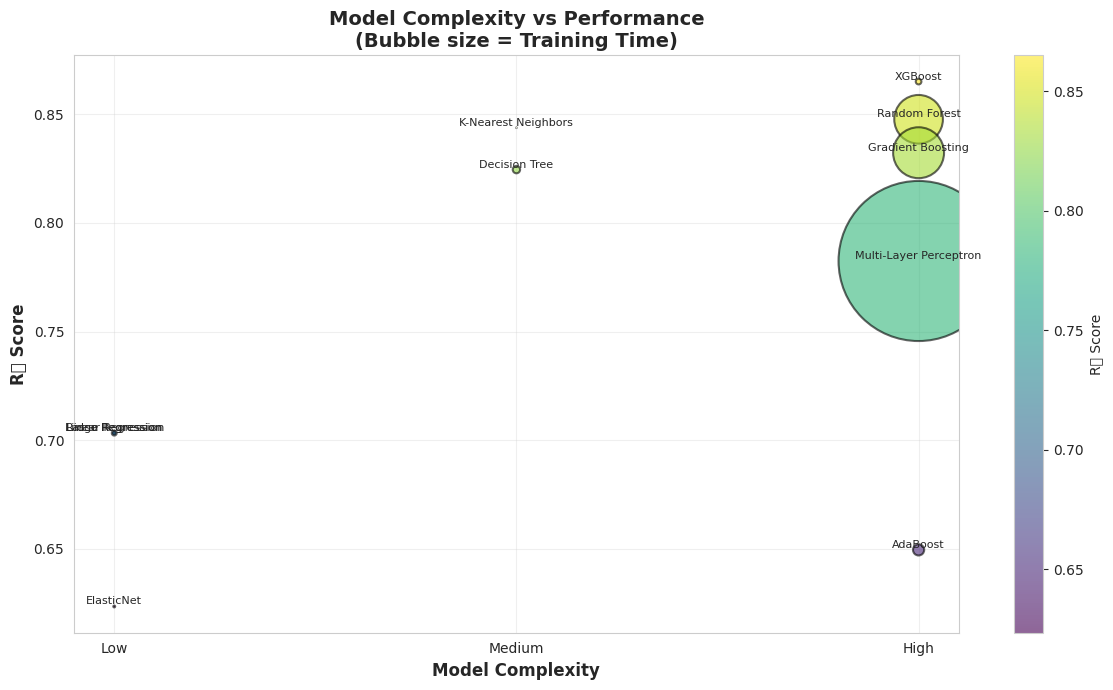



💡 FINAL RECOMMENDATIONS
--------------------------------------------------------------------------------


ValueError: Format specifier missing precision

In [ ]:


print("\n" + "="*80)
print("COMPARATIVE ANALYSIS OF MODELS")
print("="*80)

# -----------------------------
# 9.1 Performance Summary
# -----------------------------

print("\n📊 PERFORMANCE SUMMARY")
print("-" * 80)

# Best models for each metric (Testing Set)
print("\n🏆 BEST MODELS BY METRIC (Testing Set)")
print("-" * 80)

metrics_for_comparison = ['R Score', 'RMSE', 'MAE', 'MAPE (%)', 'Explained Variance']

for metric in metrics_for_comparison:
    if metric in test_results.columns:
        ascending = (metric not in ['R Score', 'Explained Variance', 'Adjusted R'])
        best_model = test_results.sort_values(metric, ascending=ascending).iloc[0]

        print(f"\n{metric}:")
        print(f"  Best Model: {best_model. name}")
        print(f"  Score: {best_model[metric]:.4f}")

# -----------------------------
# 9. 2 Overfitting Analysis
# -----------------------------

print("\n\n🔍 OVERFITTING ANALYSIS")
print("-" * 80)

# Calculate overfitting metrics
overfitting_analysis = []

for model_name in train_results.index:
    train_r2 = train_results.loc[model_name, 'R Score']
    test_r2 = test_results.loc[model_name, 'R Score']

    r2_diff = train_r2 - test_r2
    overfitting_ratio = (r2_diff / train_r2 * 100) if train_r2 != 0 else 0

    overfitting_analysis. append({
        'Model': model_name,
        'Training R': train_r2,
        'Testing R': test_r2,
        'R Difference': r2_diff,
        'Overfitting (%)': overfitting_ratio
    })

overfitting_df = pd.DataFrame(overfitting_analysis). sort_values('Overfitting (%)')

display(overfitting_df)

# Visualize overfitting
plt. figure(figsize=(14, 8))
plt.barh(overfitting_df['Model'], overfitting_df['Overfitting (%)'], color='orange', edgecolor='black')
plt. xlabel('Overfitting Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt. title('Overfitting Analysis (Lower is Better)', fontsize=14, fontweight='bold')
plt. axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='10% Threshold')
plt.legend(fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 9.3 Model Ranking
# -----------------------------

print("\n\n🏅 OVERALL MODEL RANKING")
print("-" * 80)

# Create a ranking system based on multiple criteria
# Normalize metrics to 0-1 scale and compute overall score

from sklearn.preprocessing import MinMaxScaler

ranking_data = test_results[['R Score', 'RMSE', 'MAE']].copy()

# For R, higher is better.  For RMSE and MAE, lower is better
# We'll invert RMSE and MAE so higher normalized score is better

scaler = MinMaxScaler()

ranking_data['R_normalized'] = scaler.fit_transform(ranking_data[['R Score']])
ranking_data['RMSE_normalized'] = 1 - scaler.fit_transform(ranking_data[['RMSE']])
ranking_data['MAE_normalized'] = 1 - scaler.fit_transform(ranking_data[['MAE']])

# Calculate overall score (equal weights)
ranking_data['Overall_Score'] = (
    ranking_data['R_normalized'] +
    ranking_data['RMSE_normalized'] +
    ranking_data['MAE_normalized']
) / 3

# Add training time as a factor (if faster is better)
if training_times:
    training_time_series = pd.Series(training_times)
    training_time_series = training_time_series[ranking_data. index]
    ranking_data['Training_Time'] = training_time_series

    # Normalize training time (lower is better)
    ranking_data['Time_normalized'] = 1 - scaler.fit_transform(ranking_data[['Training_Time']])

    # Recalculate overall score with training time (10% weight)
    ranking_data['Overall_Score_with_Time'] = (
        ranking_data['Overall_Score'] * 0.9 +
        ranking_data['Time_normalized'] * 0.1
    )

    ranking_data = ranking_data.sort_values('Overall_Score_with_Time', ascending=False)
    ranking_data['Rank'] = range(1, len(ranking_data) + 1)

    print("\nFinal Model Rankings (Considering Performance + Training Time):")
    display(ranking_data[['Rank', 'Overall_Score_with_Time', 'Training_Time']])
else:
    ranking_data = ranking_data.sort_values('Overall_Score', ascending=False)
    ranking_data['Rank'] = range(1, len(ranking_data) + 1)

    print("\nFinal Model Rankings (Based on Performance Only):")
    display(ranking_data[['Rank', 'Overall_Score']])

# Visualize rankings
score_col = 'Overall_Score_with_Time' if 'Overall_Score_with_Time' in ranking_data. columns else 'Overall_Score'

plt.figure(figsize=(14, 8))
plt.barh(ranking_data. index, ranking_data[score_col], color='gold', edgecolor='black')
plt.xlabel('Overall Score', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('Overall Model Performance Ranking', fontsize=14, fontweight='bold')
plt. grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 9.4 Statistical Comparison
# -----------------------------

print("\n\n📈 STATISTICAL COMPARISON")
print("-" * 80)

# Summary statistics across all models
summary_stats = test_results[['R Score', 'RMSE', 'MAE']].describe()

print("\nSummary Statistics (Testing Set):")
display(summary_stats)

# -----------------------------
# 9.5 Model Complexity vs Performance
# -----------------------------

print("\n\n⚙️ MODEL COMPLEXITY vs PERFORMANCE")
print("-" * 80)

# Define model complexity (simplified categorization)
model_complexity = {
    'Linear Regression': 'Low',
    'Ridge Regression': 'Low',
    'Lasso Regression': 'Low',
    'ElasticNet': 'Low',
    'K-Nearest Neighbors': 'Medium',
    'Decision Tree': 'Medium',
    'Support Vector Regression': 'Medium',
    'Random Forest': 'High',
    'Gradient Boosting': 'High',
    'AdaBoost': 'High',
    'XGBoost': 'High',
    'LightGBM': 'High',
    'Multi-Layer Perceptron': 'High'
}

complexity_df = pd.DataFrame({
    'Model': test_results.index,
    'Complexity': [model_complexity. get(m, 'Unknown') for m in test_results.index],
    'R Score': test_results['R Score']. values,
    'Training Time (s)': [training_times. get(m, np.nan) for m in test_results.index]
})

print("\nModel Complexity Analysis:")
display(complexity_df)

# Visualize complexity vs performance
complexity_order = {'Low': 1, 'Medium': 2, 'High': 3}
complexity_df['Complexity_Num'] = complexity_df['Complexity'].map(complexity_order)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(complexity_df['Complexity_Num'], complexity_df['R Score'],
                     s=complexity_df['Training Time (s)'] * 10,
                     alpha=0.6, c=complexity_df['R Score'],
                     cmap='viridis', edgecolors='black', linewidths=1.5)

for idx, row in complexity_df.iterrows():
    plt.annotate(row['Model'], (row['Complexity_Num'], row['R Score']),
                fontsize=8, ha='center', va='bottom')

plt.xlabel('Model Complexity', fontsize=12, fontweight='bold')
plt.ylabel('R Score', fontsize=12, fontweight='bold')
plt. title('Model Complexity vs Performance\n(Bubble size = Training Time)',
         fontsize=14, fontweight='bold')
plt. xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.colorbar(scatter, label='R Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 9.6 Final Recommendations
# -----------------------------

print("\n\n💡 FINAL RECOMMENDATIONS")
print("-" * 80)

best_overall_model = ranking_data.index[0]
best_r2_model = test_results.sort_values('R Score', ascending=False).index[0]
fastest_model = min([model for model in training_times if training_times[model] is not None], key=training_times.get)
least_overfitting = overfitting_df.iloc[0]['Model']

print(f"""
Based on comprehensive analysis:

1. 🏆 BEST OVERALL MODEL: {best_overall_model}
   - Balanced performance across all metrics
   - Overall Score: {ranking_data.loc[best_overall_model, score_col]:.4f}

2. 🎯 HIGHEST ACCURACY: {best_r2_model}
   - Best R Score: {test_results.loc[best_r2_model, 'R Score']:.4f}
   - RMSE: {test_results.loc[best_r2_model, 'RMSE']:.4f}

3. ⚡ FASTEST TRAINING: {fastest_model}
   - Training Time: {training_times[fastest_model]:.2f} seconds
   - R Score: {test_results.loc[fastest_model, 'R Score']:.4f}

4. 🏅 LEAST OVERFITTING: {least_overfitting}
   - Overfitting: {overfitting_df.iloc[0]['Overfitting (%)']:.2f}%
   - Generalizes well to unseen data

RECOMMENDATION FOR PRODUCTION:
Use {best_overall_model} for the best balance of accuracy, speed, and generalization.
""")

print("\n✅ Comparative analysis completed successfully!")

# STEP 10: PREDICTION FUNCTION

In [ ]:


print("\n" + "="*80)
print("PREDICTION FUNCTION")
print("="*80)

def predict_cpu_burst(sample_data, models_dict=trained_models, scaler=scaler_standard,
                     feature_names=X_train.columns):
    """
    Predict CPU burst time using all trained models

    Parameters:
    -----------
    sample_data : dict, pd.DataFrame, or pd.Series
        Input data for prediction.  Can be:
        - Dictionary with feature names as keys
        - pandas DataFrame (single or multiple rows)
        - pandas Series

    models_dict : dict
        Dictionary of trained models

    scaler : StandardScaler
        Fitted scaler for preprocessing

    feature_names : list
        List of feature names in correct order

    Returns:
    --------
    pd.DataFrame
        Predictions from all models
    """

    print("\n" + "="*80)
    print("🔮 PREDICTING CPU BURST TIME")
    print("="*80)

    # Convert input to DataFrame
    if isinstance(sample_data, dict):
        df_input = pd.DataFrame([sample_data])
    elif isinstance(sample_data, pd.Series):
        df_input = pd.DataFrame([sample_data])
    elif isinstance(sample_data, pd.DataFrame):
        df_input = sample_data. copy()
    else:
        raise ValueError("Input must be a dictionary, pandas Series, or pandas DataFrame")

    print(f"\n📝 Input data shape: {df_input. shape}")
    print(f"   Number of samples: {df_input.shape[0]}")
    print(f"   Number of features: {df_input.shape[1]}")

    # Ensure all required features are present
    missing_features = set(feature_names) - set(df_input.columns)
    if missing_features:
        print(f"\n⚠️ Warning: Missing features: {missing_features}")
        print("   Filling missing features with 0...")
        for feature in missing_features:
            df_input[feature] = 0

    # Ensure features are in the same order as training
    df_input = df_input[feature_names]

    # Handle missing values
    df_input = df_input.fillna(df_input.median())

    # Scale the input
    try:
        input_scaled = scaler.transform(df_input)
        input_scaled = pd.DataFrame(input_scaled, columns=feature_names, index=df_input.index)
    except Exception as e:
        print(f"⚠️ Warning: Scaling failed ({str(e)}).  Using unscaled data.")
        input_scaled = df_input

    # Make predictions with all models
    predictions_dict = {}

    print("\n🔍 Making predictions with all models...")
    print("-" * 80)

    for model_name, model in models_dict. items():
        if model is None:
            continue

        try:
            pred = model.predict(input_scaled)
            predictions_dict[model_name] = pred
            print(f"✅ {model_name}: {pred[0]:.2f}")
        except Exception as e:
            print(f"❌ {model_name}: Prediction failed ({str(e)})")
            predictions_dict[model_name] = [np.nan] * len(df_input)

    # Create results DataFrame
    results = pd.DataFrame(predictions_dict, index=df_input.index)

    # Add statistics
    results['Mean Prediction'] = results.mean(axis=1)
    results['Median Prediction'] = results.median(axis=1)
    results['Std Deviation'] = results.std(axis=1)
    results['Min Prediction'] = results.min(axis=1)
    results['Max Prediction'] = results.max(axis=1)

    print("\n" + "="*80)
    print("📊 PREDICTION SUMMARY")
    print("="*80)

    for idx in results.index:
        print(f"\nSample {idx}:")
        print(f"  Mean Prediction: {results.loc[idx, 'Mean Prediction']:.2f}")
        print(f"  Median Prediction: {results.loc[idx, 'Median Prediction']:.2f}")
        print(f"  Range: [{results.loc[idx, 'Min Prediction']:.2f}, {results.loc[idx, 'Max Prediction']:.2f}]")
        print(f"  Std Deviation: {results.loc[idx, 'Std Deviation']:.2f}")

    # Visualize predictions
    if len(results) == 1:
        # Single sample - bar chart
        model_predictions = results.iloc[0].drop(['Mean Prediction', 'Median Prediction',
                                                   'Std Deviation', 'Min Prediction', 'Max Prediction'])

        plt. figure(figsize=(14, 6))
        plt.bar(range(len(model_predictions)), model_predictions. values,
               color='steelblue', edgecolor='black')
        plt.axhline(y=results.iloc[0]['Mean Prediction'], color='red',
                   linestyle='--', linewidth=2, label=f'Mean: {results.iloc[0]["Mean Prediction"]:.2f}')
        plt.axhline(y=results.iloc[0]['Median Prediction'], color='green',
                   linestyle='--', linewidth=2, label=f'Median: {results.iloc[0]["Median Prediction"]:.2f}')

        plt. xticks(range(len(model_predictions)), model_predictions.index, rotation=45, ha='right')
        plt.xlabel('Model', fontsize=12, fontweight='bold')
        plt.ylabel('Predicted CPU Burst Time', fontsize=12, fontweight='bold')
        plt.title('Predictions from All Models', fontsize=14, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(axis='y', alpha=0. 3)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple samples - heatmap
        plt.figure(figsize=(16, max(6, len(results) * 0.5)))

        # Select only model predictions (exclude statistics columns)
        model_cols = [col for col in results. columns if col not in
                     ['Mean Prediction', 'Median Prediction', 'Std Deviation',
                      'Min Prediction', 'Max Prediction']]

        sns.heatmap(results[model_cols].T, annot=True, fmt='.2f', cmap='YlOrRd',
                   cbar_kws={'label': 'Predicted CPU Burst Time'})
        plt. xlabel('Sample Index', fontsize=12, fontweight='bold')
        plt.ylabel('Model', fontsize=12, fontweight='bold')
        plt.title('Predictions from All Models (Multiple Samples)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    return results

# -----------------------------
# Example Usage
# -----------------------------

print("\n" + "="*80)
print("EXAMPLE PREDICTIONS")
print("="*80)

# Example 1: Predict using a single sample from test set
print("\n📌 EXAMPLE 1: Single Sample from Test Set")
print("-" * 80)

sample_idx = 0
sample = X_test.iloc[sample_idx]
actual_value = y_test.iloc[sample_idx]

print(f"\nActual CPU Burst Time: {actual_value:. 2f}")
print("\nSample Features:")
print(sample.head(10))

predictions_example1 = predict_cpu_burst(sample)

print(f"\n✅ Prediction complete!")
print(f"   Actual value: {actual_value:.2f}")
print(f"   Mean prediction: {predictions_example1['Mean Prediction']. iloc[0]:.2f}")
print(f"   Prediction error: {abs(actual_value - predictions_example1['Mean Prediction'].iloc[0]):.2f}")

# Example 2: Predict using multiple samples
print("\n\n📌 EXAMPLE 2: Multiple Samples from Test Set")
print("-" * 80)

samples = X_test.iloc[:5]
actual_values = y_test.iloc[:5]

print(f"\nActual CPU Burst Times:")
print(actual_values)

predictions_example2 = predict_cpu_burst(samples)

print("\n✅ Predictions complete!")

# Example 3: Custom input (create a synthetic sample)
print("\n\n📌 EXAMPLE 3: Custom Input")
print("-" * 80)

# Create a custom sample using median values
custom_sample = X_train.median(). to_dict()

print("\nCustom sample (using median values from training set):")
print(pd.Series(custom_sample).head(10))

predictions_example3 = predict_cpu_burst(custom_sample)

print("\n✅ Custom prediction complete!")

print("\n" + "="*80)
print("🎉 ALL STEPS COMPLETED SUCCESSFULLY!")
print("="*80)

print("""
SUMMARY:
✅ Step 1: Libraries imported
✅ Step 2: Data loaded
✅ Step 3: EDA completed (descriptive + visualization)
✅ Step 4: Data preprocessed and split
✅ Step 5: Feature engineering applied
✅ Step 6: All models initialized
✅ Step 7: All models trained
✅ Step 8: All models evaluated and visualized
✅ Step 9: Comparative analysis performed
✅ Step 10: Prediction function created and tested

You can now use the predict_cpu_burst() function to make predictions
on new data samples!
""")